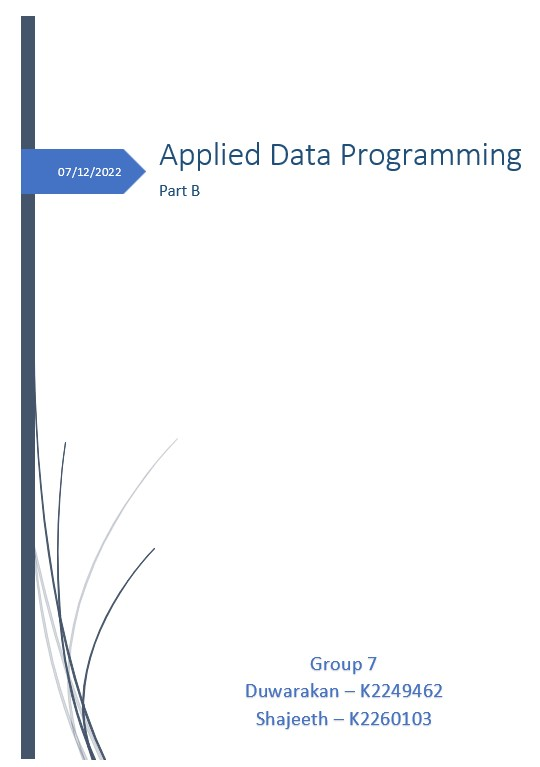

In [1415]:
# Import essential libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import warnings

In [1416]:
# Import openstreet library
import folium
from folium import plugins

In [1417]:
# Change global behavior of pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [1418]:
# remove unnecessary messages 
warnings.filterwarnings('ignore')

In [1419]:
# Comment the below cell if you are not running in Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1420]:
# read csv file into data frame using pandas
path = "/content/drive/MyDrive/Colab Notebooks/Crime_original.csv"
df = pd.read_csv(path)

# Initial Data Analysis:





## 1) Quality of data:

### a) Size of the dataset (Number of features and observations)

In [1421]:
# Shape of the data(number of features and rows)
df.shape

(306094, 30)

In [1422]:
# Print a concise summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

###    b) Frequency counts(Missing values)

In [1423]:
# Number of emphty rows in each coloumns
df.isna().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       49029
NIBRS Code                     0
Victims                        0
Crime Name1                  272
Crime Name2                  272
Crime Name3                  272
Police District Name          94
Block Address              26206
City                        1276
State                          0
Zip Code                    3179
Agency                         0
Place                          0
Sector                      1530
Beat                        1530
PRA                          239
Address Number             26109
Street Prefix             292463
Street Name                    1
Street Suffix             300662
Street Type                  339
Start_Date_Time                0
End_Date_Time             161658
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

### c) Descriptive/Summary statistics (mean, median, standard deviation, etc.)`



In [1424]:
#Descriptive statistics of categorical values
df.describe(include=np.object)

Offence Code    Dispatch Date / Time NIBRS Code  \
count         306094                  257065     306094   
unique           619                  235077         58   
top             2305  12/02/2019 04:39:39 PM        90Z   
freq           20641                      48      75378   

                   Crime Name1         Crime Name2          Crime Name3  \
count                   305822              305822               305822   
unique                       5                  59                  336   
top     Crime Against Property  All Other Offenses  LARCENY - FROM AUTO   
freq                    139882               72402                26275   

       Police District Name             Block Address           City   State  \
count                306000                    279888         304818  306094   
unique                    9                     21503             66      11   
top           SILVER SPRING  11100 BLK  VEIRS MILL RD  SILVER SPRING      MD   
freq                  64388                      4048         105487  305874   

        Agency                Place  Sector    Beat       PRA Street Prefix  \
count   306094               306094  304564  304564  305855.0         13631   
unique       8                   99      15      56    1557.0             4   
top       MCPD  Street - In vehicle       P     3G1     702.0             E   
freq    264623                33610   29400   19763    4242.0          4931   

       Street Name Street Suffix Street Type         Start_Date_Time  \
count       306093          5432      305755                  306094   
unique        7777             7          32                  221547   
top        GEORGIA             W          RD  11/30/2019 12:00:00 PM   
freq         13397          3014       76111                      43   

                 End_Date_Time Police District Number    Location  
count                   144436                 306094      306094  
unique                  101809                     15       33635  
top     12/02/2019 09:30:00 AM                     3D  (0.0, 0.0)  
freq                        42                  64388        7325

In [1425]:
#Descriptive statistics of Numerical values
df.describe()

Incident ID     CR Number        Victims       Zip Code  \
count  3.060940e+05  3.060940e+05  306094.000000  302915.000000   
mean   2.012369e+08  1.692787e+08       1.022692   20876.535939   
std    8.626185e+04  6.210304e+07       0.192311     170.157722   
min    2.010871e+08  1.001107e+07       1.000000       6.000000   
25%    2.011625e+08  1.705431e+08       1.000000   20853.000000   
50%    2.012361e+08  1.900183e+08       1.000000   20878.000000   
75%    2.013109e+08  2.000466e+08       1.000000   20904.000000   
max    2.013872e+08  2.204211e+08      22.000000   29882.000000   

       Address Number       Latitude      Longitude  
count    2.799850e+05  306094.000000  306094.000000  
mean     8.393001e+03      38.146328     -75.269490  
std      1.526296e+04       5.974082      11.786118  
min      1.000000e+00       0.000000     -77.516753  
25%      1.600000e+03      39.020392     -77.197117  
50%      8.100000e+03      39.072844     -77.099464  
75%      1.250000e+04      39.142072     -77.029046  
max      2.090600e+06      90.000000       0.000000

### d) Outliers detection

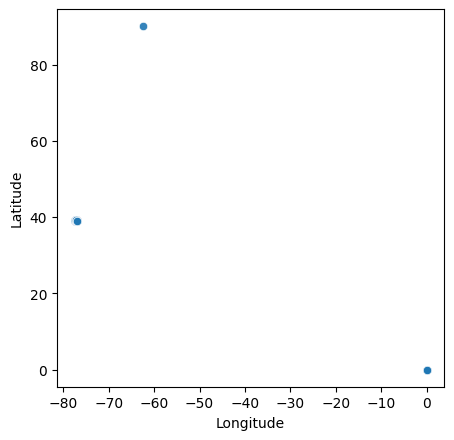

In [1426]:
# Scatterplot for Longtitute and latitude coloumns
plt.figure(figsize=(5,5), dpi=100)
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.9)

In [1427]:
# Outlier detection for Longtitue and Latitude
df['Longitude'].describe()

count    306094.000000
mean        -75.269490
std          11.786118
min         -77.516753
25%         -77.197117
50%         -77.099464
75%         -77.029046
max           0.000000
Name: Longitude, dtype: float64

In [1428]:
IQR = -77.029046 - -77.197117
upper_limit = -77.029046 + 1.5*IQR
lower_limit = -77.197117 - 1.5*IQR

In [1429]:
upper_limit

-76.77693949999997

In [1430]:
lower_limit

-77.44922350000002

In [1431]:
df['Latitude'].describe()

count    306094.000000
mean         38.146328
std           5.974082
min           0.000000
25%          39.020392
50%          39.072844
75%          39.142072
max          90.000000
Name: Latitude, dtype: float64

In [1432]:
IQR = 39.142588 - 39.022272
upper_limit = 39.142588 + 1.5*IQR
lower_limit = 39.022272 - 1.5*IQR

In [1433]:
upper_limit

39.32306200000001

In [1434]:
lower_limit

38.841798

In [1435]:
# check outlier coordinates
df[(df['Longitude'] > -10) | (df['Latitude'] > 45)].head(5)

Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
13     201357499         5404  210051644  12/18/2021 11:30:27 PM        90D   
42     201358863         5404  210053293  12/31/2021 01:47:33 AM        90D   
53     201346532         2305  210037745  09/24/2021 05:25:58 AM        23F   
162    201357957         9105  210052242  12/22/2021 05:25:02 PM        90Z   
200    201336300         2303  210024908  06/29/2021 11:47:11 AM        23C   

     Victims             Crime Name1                  Crime Name2  \
13         1   Crime Against Society  Driving Under the Influence   
42         1   Crime Against Society  Driving Under the Influence   
53         1  Crime Against Property     Theft From Motor Vehicle   
162        1                   Other           All Other Offenses   
200        1  Crime Against Property                  Shoplifting   

                            Crime Name3 Police District Name  \
13   DRIVING UNDER THE INFLUENCE LIQUOR           GERMANTOWN   
42   DRIVING UNDER THE INFLUENCE LIQUOR   MONTGOMERY VILLAGE   
53                  LARCENY - FROM AUTO        SILVER SPRING   
162                       LOST PROPERTY             BETHESDA   
200               LARCENY - SHOPLIFTING                OTHER   

                  Block Address           City State  Zip Code Agency  \
13                          NaN     GERMANTOWN    MD   20876.0    GPD   
42                          NaN   GAITHERSBURG    MD   20886.0   MCPD   
53        11600 BLK  STEWART LA  SILVER SPRING    MD   20904.0   MCPD   
162      5800 BLK  NICHOLSON LA      ROCKVILLE    MD   20852.0   MCPD   
200  5300 BLK  WISCONSIN AVE NW    CHEVY CHASE    DC   20815.0   MCPD   

                                  Place Sector Beat  PRA  Address Number  \
13                  Street - In vehicle      M  5M1  470             NaN   
42                  Street - In vehicle      R  6R2  544             NaN   
53            Parking Lot - Residential      I  3I1  145         11600.0   
162                       Other/Unknown      D  2D4  189          5800.0   
200  Retail - Department/Discount Store    NaN  NaN  NaN          5300.0   

    Street Prefix Street Name Street Suffix Street Type  \
13            NaN   FREDERICK           NaN          RD   
42            NaN   CENTERWAY           NaN          RD   
53            NaN     STEWART           NaN          LA   
162           NaN   NICHOLSON           NaN          LA   
200           NaN   WISCONSIN            NW         AVE   

            Start_Date_Time           End_Date_Time  Latitude  Longitude  \
13   12/19/2021 01:41:00 AM                     NaN       0.0        0.0   
42   12/31/2021 01:47:00 AM                     NaN       0.0        0.0   
53   09/23/2021 04:00:00 PM  09/24/2021 05:15:00 AM       0.0        0.0   
162  12/20/2021 08:15:00 PM                     NaN       0.0        0.0   
200  06/27/2021 04:00:00 PM  06/27/2021 04:05:00 PM       0.0        0.0   

    Police District Number    Location  
13                      5D  (0.0, 0.0)  
42                      6D  (0.0, 0.0)  
53                      3D  (0.0, 0.0)  
162                     2D  (0.0, 0.0)  
200                  OTHER  (0.0, 0.0)

In [1436]:
# drop outlier coordinates containing rows
df.drop(df[df['Longitude'] > -10].index, inplace = True)
df.drop(df[df['Latitude'] > 45].index, inplace = True)

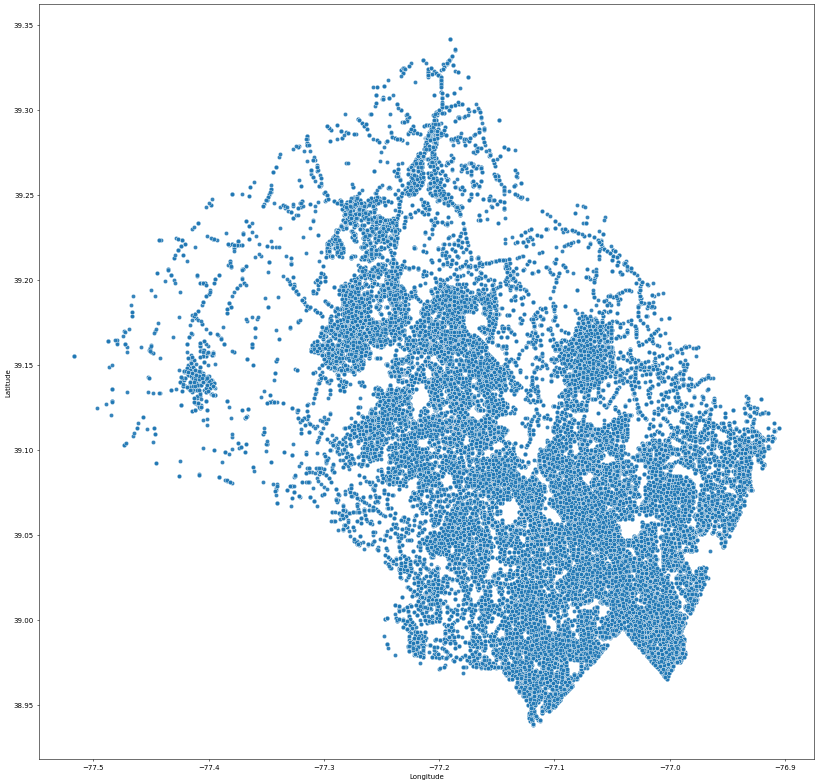

In [1437]:
# Plot the same scatterplot but outliers removed
plt.figure(figsize=(20,20), dpi=50)
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.9)

### E) Normality (frequency histograms)

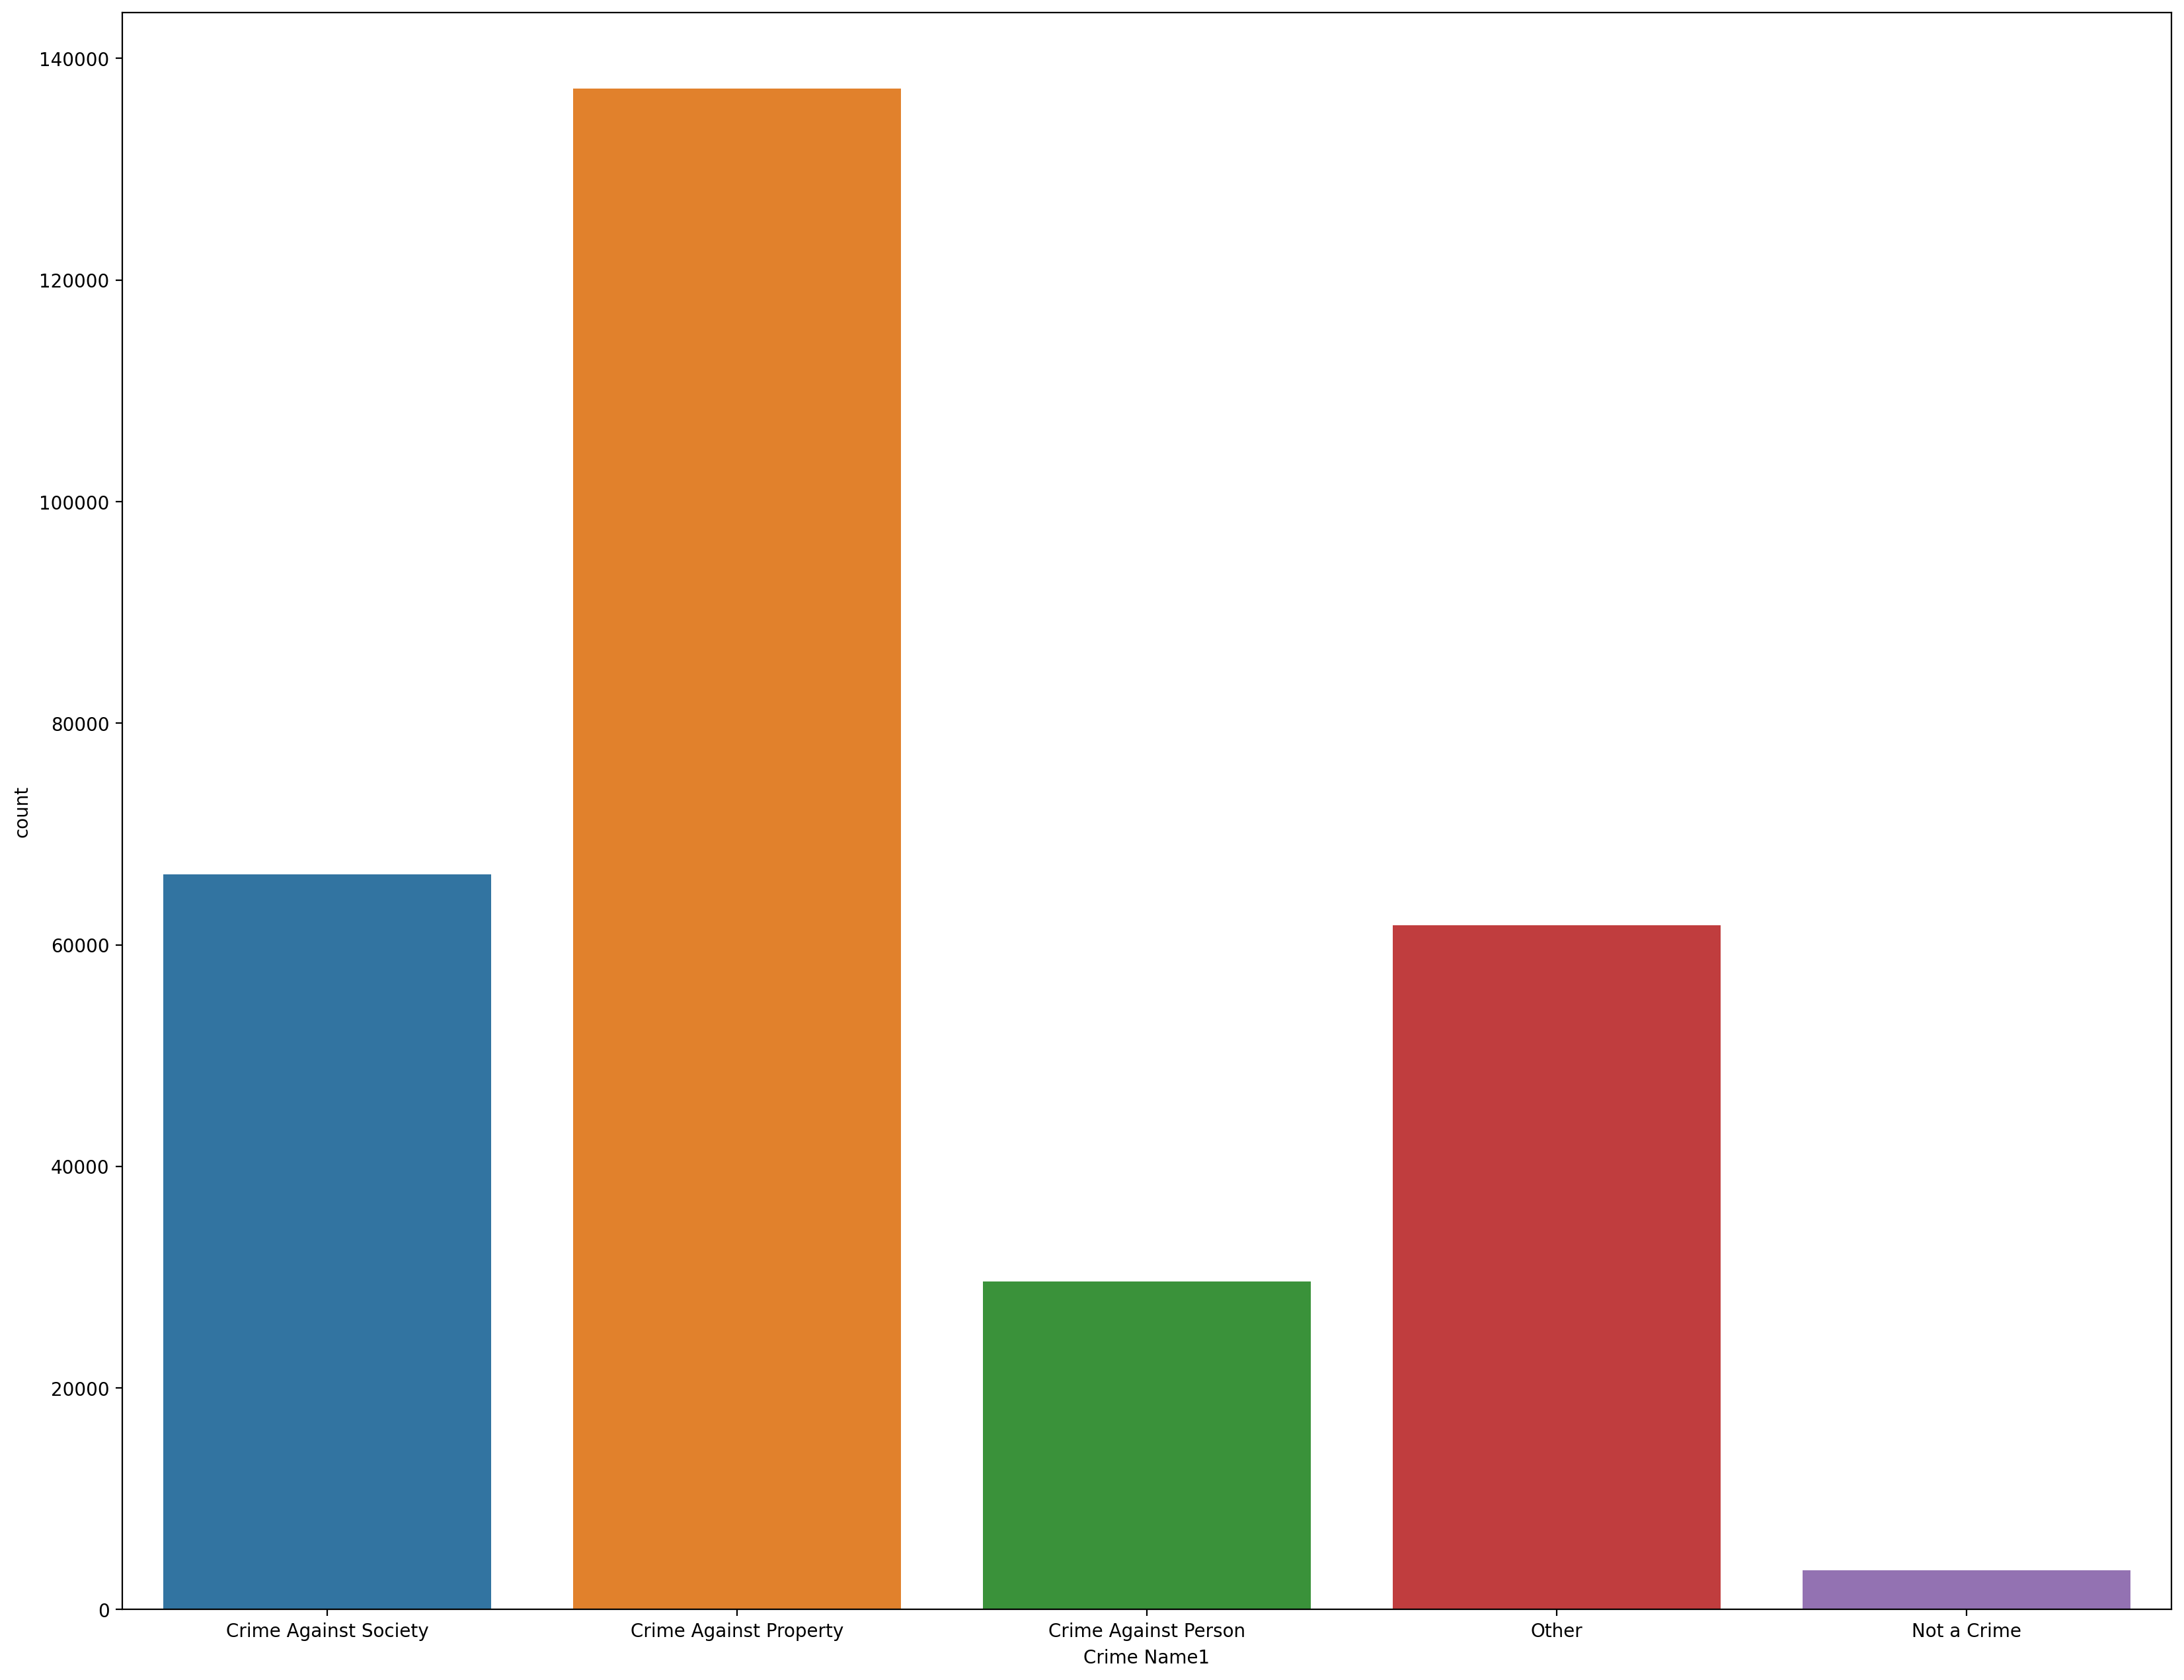

In [1438]:
# countplot for Crime Name1 frequencies
plt.figure(figsize=(20,16), dpi=200)
sns.countplot(data=df, x='Crime Name1')

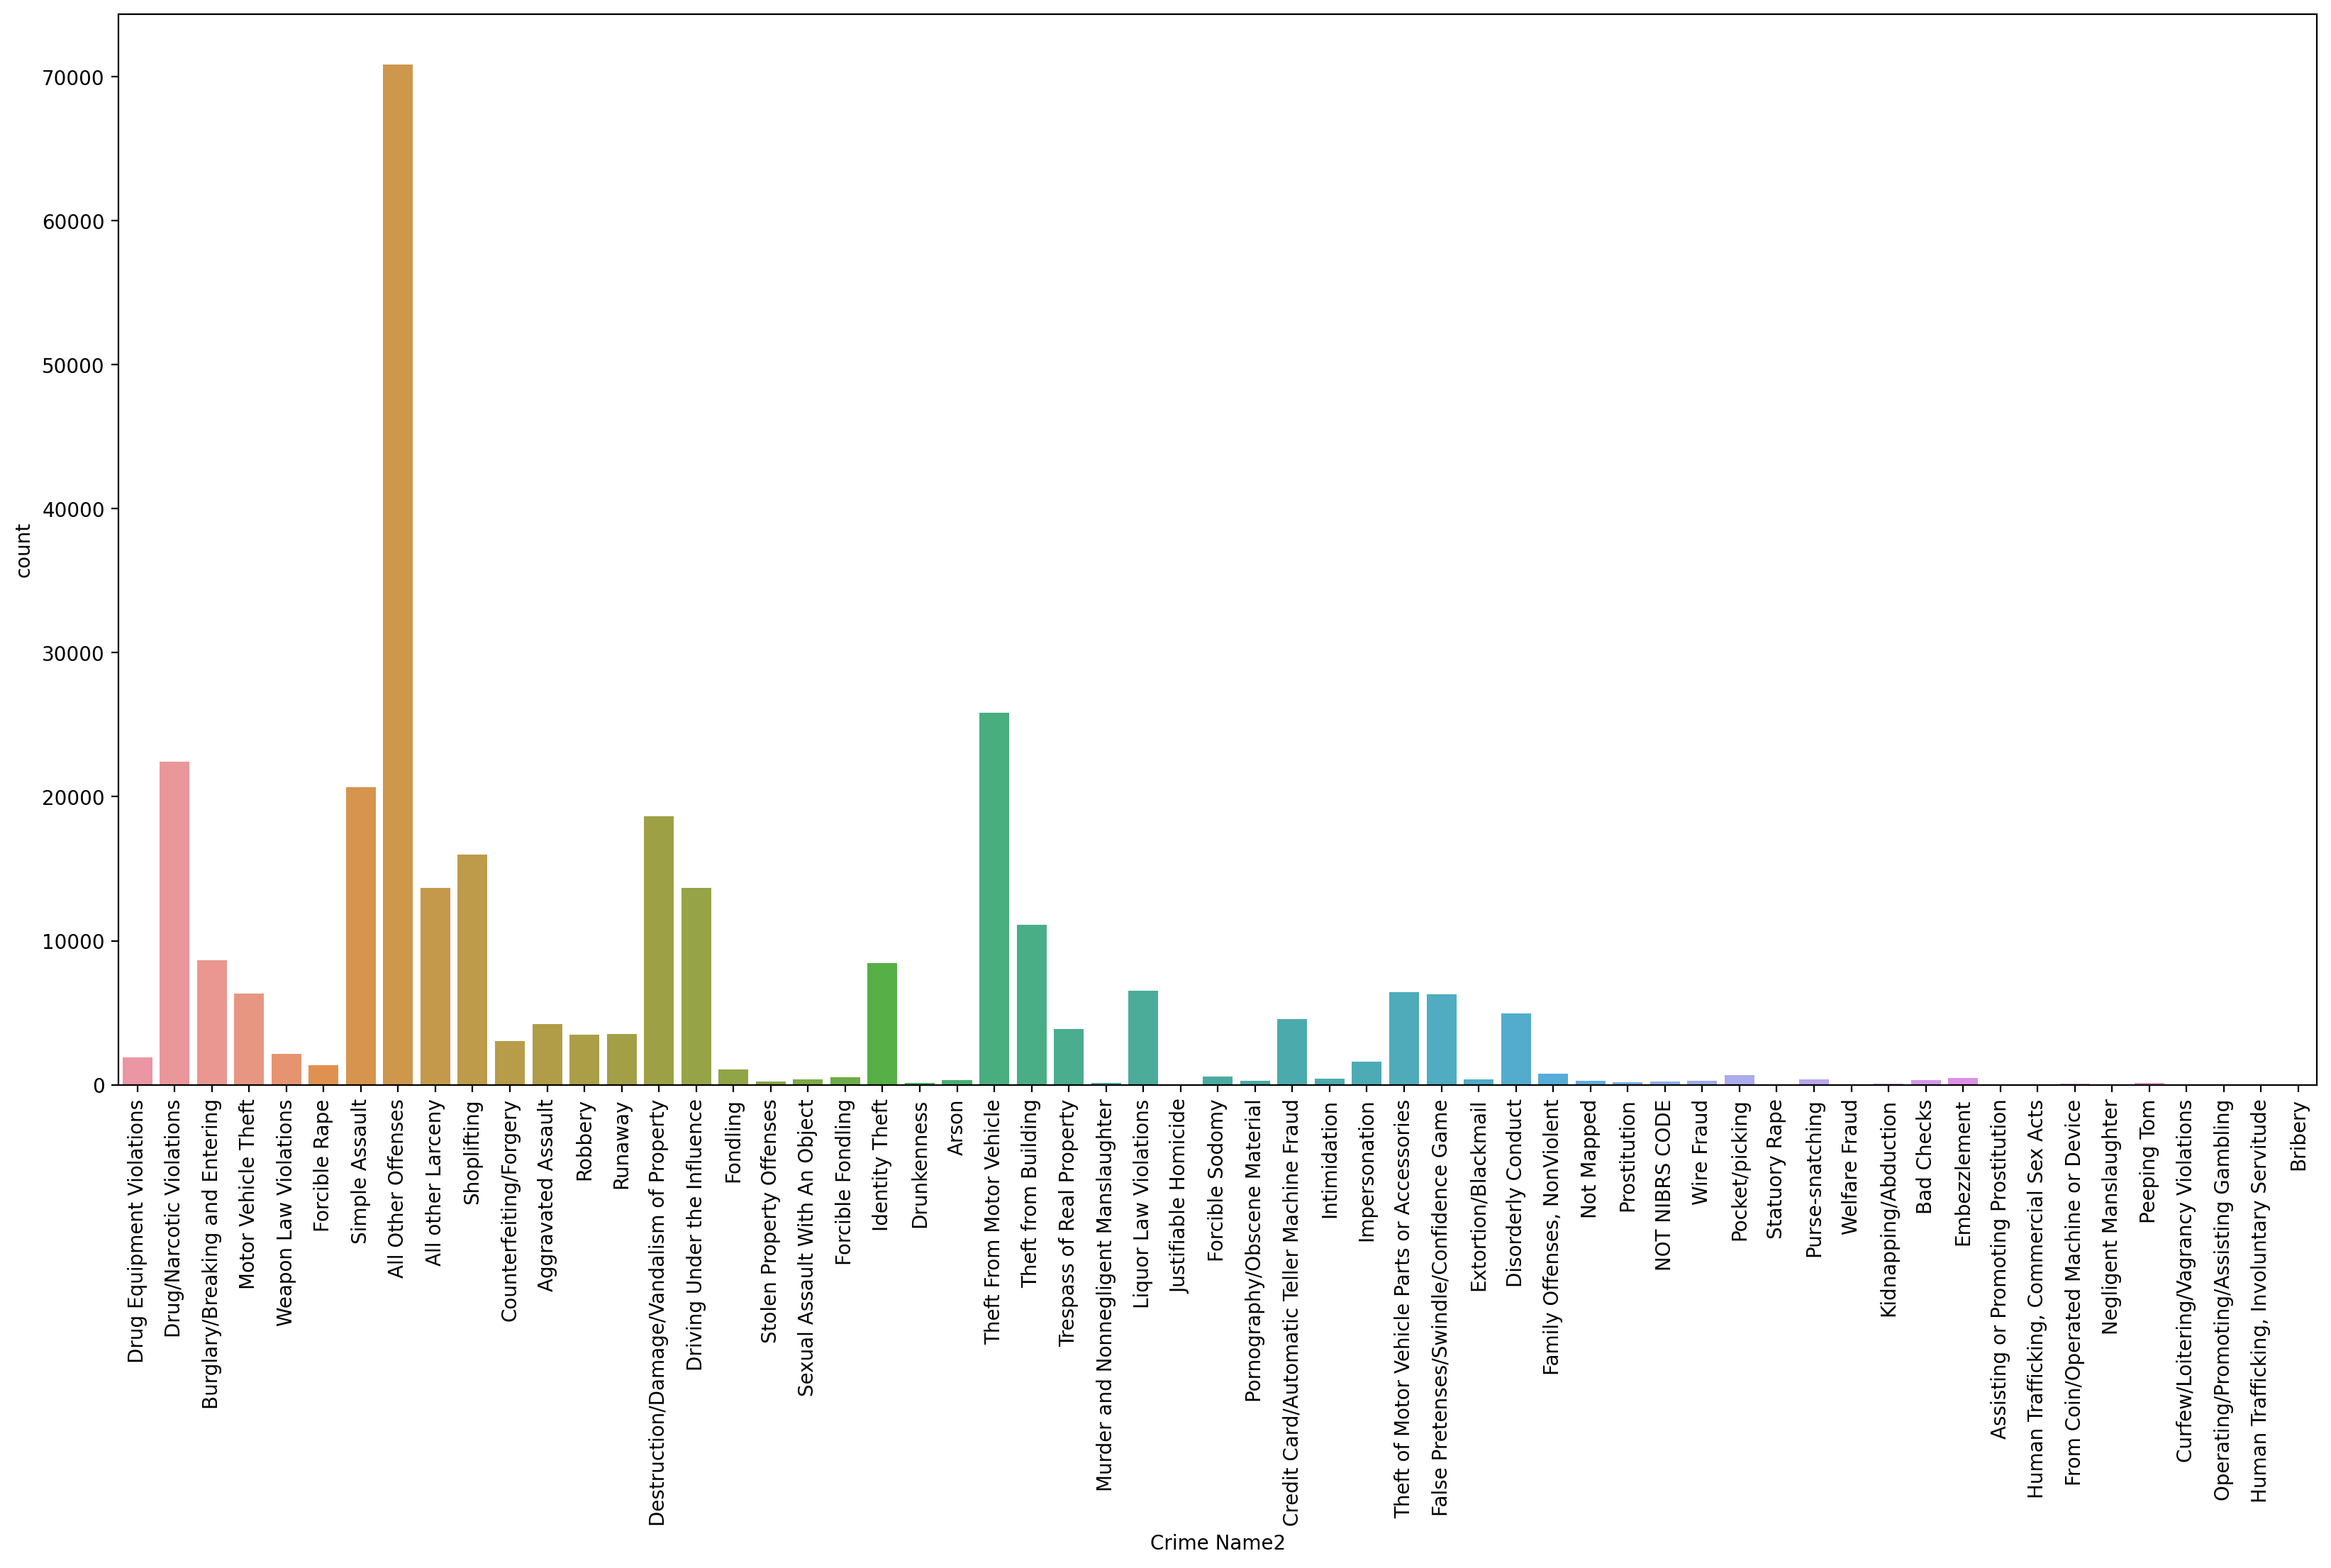

In [1439]:
plt.figure(figsize=(20,10), dpi=200)
plt.xticks(rotation=90)
sns.countplot(data=df, x='Crime Name2')

## 2) Quality of measurements, if applicable

Apart from some of the missing values, measurement quality is very high if human and instrument errors are ignored. For instance the time column is measured up to seconds precise, and location precision is about six decimal points.

In [1440]:
# Random sample from location coloumn and time coloumn to show the precision of the measurement
print("Sample Longitute: " + str(df["Longitude"].sample(1, ignore_index=True).values));
print("Sample Datetime: "+ str(df["Start_Date_Time"].sample(1, ignore_index=True).values));

Sample Longitute: [-77.06029294]
Sample Datetime: ['06/05/2019 07:00:00 PM']


## 3) Data transformation: data merging (features and labels), transpose, data type change, data sorting, data deletion, etc

In [1441]:
# Data type change
df['Dispatch Date / Time'] =  pd.to_datetime(df['Dispatch Date / Time'])
df['Start_Date_Time'] =  pd.to_datetime(df['Start_Date_Time'])

In [1442]:
print(df["Dispatch Date / Time"].min(),df["Dispatch Date / Time"].max())

2017-04-02 07:37:54 2022-08-07 18:15:25


In [1443]:
# Data merging (Creating coloumns)
# for Gun or narcotics coloumn
firarm_drug_keyword = ["GUN", "DRUG", "WEAPON", "LIQUOR", "DRUNKENNESS"]
def check_drug_narcotic(crime_type_3):
  if crime_type_3 is np.nan:
    return "Non drugs and Narcotics"
  else:
    for words in firarm_drug_keyword:
      if words.lower() in crime_type_3.lower():
        return "Drugs or Narcotics"
      else:
        pass
    return "Non drugs and Narcotics"


# Online, Offline crimes coloumn
online_fraud_keyword = ["FRAUD BY WIRE", "FRAUD - MAIL", "EMBEZZLE - BANKING-TYPE INST"]
def check_online_fraud(crime_type_3):
  if crime_type_3 is np.nan:
    return "Offline crimes"
  else:
    for words in online_fraud_keyword:
      if words.lower() in crime_type_3.lower():
        return "Online frauds"
      else:
        pass
    return "Offline crimes"

# Period of the day coloumn
def findTimesOfTheDay(hour):
  timeOfTheDay = ''
  if hour>=5 and hour<=12:
    timeOfTheDay = "Morning"
  elif hour>12 and hour<=17:
    timeOfTheDay = "Afternoon"
  elif hour>17 and hour<=21:
    timeOfTheDay = "Evening"
  elif hour>21 or hour<=4:
    timeOfTheDay = "Night"

  return timeOfTheDay

df["Drugs or Narcotics"] = df["Crime Name3"].apply(check_drug_narcotic)
df["Online or Offline"] = df["Crime Name3"].apply(check_online_fraud)
df['handling_time_in_hours'] = (df['Dispatch Date / Time'] - df['Start_Date_Time']).dt.total_seconds() / 60 / 60
df['year'] = pd.DatetimeIndex(df['Start_Date_Time']).year
df['month'] = pd.DatetimeIndex(df['Start_Date_Time']).month_name()
df['day'] = pd.DatetimeIndex(df['Start_Date_Time']).day
df["day_of_the_week"] = pd.DatetimeIndex(df['Start_Date_Time']).day_name()
df['hour'] = pd.DatetimeIndex(df['Start_Date_Time']).hour
df['start_time'] = pd.DatetimeIndex(df['Start_Date_Time']).time
df['time_of_the_day'] = df['hour'].apply(findTimesOfTheDay)

In [1444]:
# Drop unused coloumns
df.drop(["Incident ID",
        "Offence Code",
        "CR Number",
        # "Dispatch Date / Time",
        "NIBRS Code",
        "Block Address",
        "City",                     
        "Zip Code",                      
        "Address Number",              
        "Street Prefix",             
        "Street Name",                
        "Street Suffix",
        # "Start_Date_Time",            
        "End_Date_Time",
        # "Police District Number",
         "Sector",
         "Beat",
        #  "Police District Name",
         "PRA",
        "Location"], axis=1, inplace=True)

df.drop(df[df['handling_time_in_hours'] < 0].index, inplace = True)

In [1445]:
# By groupby year, we can see the lowest data in 2016
df.groupby("year").count()

Dispatch Date / Time  Victims  Crime Name1  Crime Name2  Crime Name3  \
year                                                                         
2016                   264    28177        28177        28177        28177   
2017                 37185    51376        51363        51363        51363   
2018                 46877    47836        47828        47828        47828   
2019                 42849    47138        47104        47104        47104   
2020                 40669    41326        41235        41235        41235   
2021                 37381    37970        37896        37896        37896   
2022                 21728    22000        21970        21970        21970   

      Police District Name  State  Agency  Place  Street Type  \
year                                                            
2016                 28177  28177   28177  28177        28177   
2017                 51376  51376   51376  51376        51209   
2018                 47836  47836   47836  47836        47812   
2019                 47138  47138   47138  47138        47121   
2020                 41325  41326   41326  41326        41307   
2021                 37882  37970   37970  37970        37957   
2022                 22000  22000   22000  22000        21991   

      Start_Date_Time  Latitude  Longitude  Police District Number  \
year                                                                 
2016            28177     28177      28177                   28177   
2017            51376     51376      51376                   51376   
2018            47836     47836      47836                   47836   
2019            47138     47138      47138                   47138   
2020            41326     41326      41326                   41326   
2021            37970     37970      37970                   37970   
2022            22000     22000      22000                   22000   

      Drugs or Narcotics  Online or Offline  handling_time_in_hours  month  \
year                                                                         
2016               28177              28177                     264  28177   
2017               51376              51376                   37185  51376   
2018               47836              47836                   46877  47836   
2019               47138              47138                   42849  47138   
2020               41326              41326                   40669  41326   
2021               37970              37970                   37381  37970   
2022               22000              22000                   21728  22000   

        day  day_of_the_week   hour  start_time  time_of_the_day  
year                                                              
2016  28177            28177  28177       28177            28177  
2017  51376            51376  51376       51376            51376  
2018  47836            47836  47836       47836            47836  
2019  47138            47138  47138       47138            47138  
2020  41326            41326  41326       41326            41326  
2021  37970            37970  37970       37970            37970  
2022  22000            22000  22000       22000            22000

In [1446]:
df.drop(df[df['year'] == 2016].index, inplace = True)

In [1447]:
# Checking the dataset after data transformation
df.sample(5)

Dispatch Date / Time  Victims             Crime Name1  \
221428  2019-01-25 15:01:09        1    Crime Against Person   
183304  2018-04-21 21:57:38        1  Crime Against Property   
111658  2022-07-04 08:09:31        1  Crime Against Property   
6900    2021-07-29 13:49:49        1  Crime Against Property   
301569  2021-03-25 16:07:57        1  Crime Against Property   

                     Crime Name2                   Crime Name3  \
221428        Aggravated Assault  ASSAULT - AGGRAVATED - OTHER   
183304  Theft From Motor Vehicle           LARCENY - FROM AUTO   
111658         All other Larceny    LARCENY (DESCRIBE OFFENSE)   
6900               Impersonation         FRAUD - IMPERSONATION   
301569         All other Larceny    LARCENY (DESCRIBE OFFENSE)   

       Police District Name State Agency                        Place  \
221428              WHEATON    MD   MCPD             Residence - Yard   
183304           GERMANTOWN    MD   MCPD    Parking Lot - Residential   
111658              WHEATON    MD   MCPD    Residence - Single Family   
6900             GERMANTOWN    MD   MCPD  Residence - Apartment/Condo   
301569   MONTGOMERY VILLAGE    MD   MCPD             Residence - Yard   

       Street Type     Start_Date_Time   Latitude  Longitude  \
221428          CT 2019-01-25 15:01:00  39.057886 -77.061119   
183304          CT 2018-04-21 21:53:00  39.175732 -77.229042   
111658          RD 2022-07-04 08:09:00  39.055430 -77.083700   
6900           CIR 2021-07-29 13:49:00  39.184754 -77.275731   
301569          ST 2021-03-22 14:00:00  39.149833 -77.188882   

       Police District Number       Drugs or Narcotics Online or Offline  \
221428                     4D  Non drugs and Narcotics    Offline crimes   
183304                     5D  Non drugs and Narcotics    Offline crimes   
111658                     4D  Non drugs and Narcotics    Offline crimes   
6900                       5D  Non drugs and Narcotics    Offline crimes   
301569                     6D  Non drugs and Narcotics    Offline crimes   

        handling_time_in_hours  year    month  day day_of_the_week  hour  \
221428                0.002500  2019  January   25          Friday    15   
183304                0.077222  2018    April   21        Saturday    21   
111658                0.008611  2022     July    4          Monday     8   
6900                  0.013611  2021     July   29        Thursday    13   
301569               74.132500  2021    March   22          Monday    14   

       start_time time_of_the_day  
221428   15:01:00       Afternoon  
183304   21:53:00         Evening  
111658   08:09:00         Morning  
6900     13:49:00       Afternoon  
301569   14:00:00       Afternoon

## 4) Characteristics of dataset:

### a)  Printing top and bottom 8 rows

In [1448]:
# Print top 8 rows of the dataset
df.head(8)

Dispatch Date / Time  Victims             Crime Name1  \
0   2018-08-23 21:52:08        1   Crime Against Society   
3   2018-06-14 22:26:45        1   Crime Against Society   
4   2018-09-03 12:06:54        1  Crime Against Property   
5   2018-09-03 12:06:54        1  Crime Against Property   
6                   NaT        1   Crime Against Society   
9                   NaT        1                   Other   
12  2019-04-11 04:44:42        1  Crime Against Property   
14  2020-09-09 14:31:46        1  Crime Against Property   

                       Crime Name2                             Crime Name3  \
0        Drug Equipment Violations        DRUGS - NARCOTIC EQUIP - POSSESS   
3         Drug/Narcotic Violations      DRUGS - OPIUM OR DERIVATIVE - SELL   
4   Burglary/Breaking and Entering  BURGLARY - NO FORCED ENTRY-RESIDENTIAL   
5              Motor Vehicle Theft              AUTO THEFT - VEHICLE THEFT   
6            Weapon Law Violations                         WEAPON - FIRING   
9               All Other Offenses                      POLICE INFORMATION   
12             Motor Vehicle Theft              AUTO THEFT - VEHICLE THEFT   
14          Counterfeiting/Forgery                       FORGERY OF CHECKS   

   Police District Name State Agency                        Place Street Type  \
0            GERMANTOWN    MD   MCPD          Street - In vehicle          RD   
3    MONTGOMERY VILLAGE    MD    GPD             Hotel/Motel/Etc.          RD   
4              BETHESDA    MD   MCPD    Residence - Single Family         AVE   
5              BETHESDA    MD   MCPD    Residence - Single Family         AVE   
6               WHEATON    MD   MCPD    Residence - Single Family          ST   
9               WHEATON    MD   MCPD  Residence -Townhouse/Duplex         AVE   
12            ROCKVILLE    MD   RCPD         Residence - Driveway          RD   
14             BETHESDA    MD   MCPD                Other/Unknown         AVE   

       Start_Date_Time   Latitude  Longitude Police District Number  \
0  2018-08-23 21:52:00  39.177744 -77.265619                     5D   
3  2018-06-14 22:26:00  39.147954 -77.218189                     6D   
4  2018-09-02 23:30:00  38.966174 -77.096561                     2D   
5  2018-09-02 23:30:00  38.966174 -77.096561                     2D   
6  2017-02-18 00:18:00  39.088902 -77.042262                     4D   
9  2017-03-08 14:03:00  39.036218 -77.049887                     4D   
12 2019-04-10 22:00:00  39.083781 -77.156818                     1D   
14 2020-09-03 14:31:00  38.988050 -77.096600                     2D   

         Drugs or Narcotics Online or Offline  handling_time_in_hours  year  \
0        Drugs or Narcotics    Offline crimes                0.002222  2018   
3        Drugs or Narcotics    Offline crimes                0.012500  2018   
4   Non drugs and Narcotics    Offline crimes               12.615000  2018   
5   Non drugs and Narcotics    Offline crimes               12.615000  2018   
6        Drugs or Narcotics    Offline crimes                     NaN  2017   
9   Non drugs and Narcotics    Offline crimes                     NaN  2017   
12  Non drugs and Narcotics    Offline crimes                6.745000  2019   
14  Non drugs and Narcotics    Offline crimes              144.012778  2020   

        month  day day_of_the_week  hour start_time time_of_the_day  
0      August   23        Thursday    21   21:52:00         Evening  
3        June   14        Thursday    22   22:26:00           Night  
4   September    2          Sunday    23   23:30:00           Night  
5   September    2          Sunday    23   23:30:00           Night  
6    February   18        Saturday     0   00:18:00           Night  
9       March    8       Wednesday    14   14:03:00       Afternoon  
12      April   10       Wednesday    22   22:00:00           Night  
14  September    3        Thursday    14   14:31:00       Afternoon

In [1449]:
# Print bottom 8 of the dataset
df.tail(8)

Dispatch Date / Time  Victims             Crime Name1  \
306083  2021-02-26 12:11:12        1  Crime Against Property   
306085  2020-12-15 00:05:16        1                   Other   
306087  2021-04-02 18:06:55        1    Crime Against Person   
306088  2021-05-14 23:19:11        1  Crime Against Property   
306089  2021-02-21 07:25:28        1    Crime Against Person   
306090  2021-05-06 22:54:47        1  Crime Against Property   
306091  2021-05-05 22:38:58        1   Crime Against Society   
306093  2021-04-19 14:17:29        1  Crime Against Property   

                                     Crime Name2  \
306083                               Shoplifting   
306085                        All Other Offenses   
306087                        Aggravated Assault   
306088  Destruction/Damage/Vandalism of Property   
306089                            Simple Assault   
306090                  Theft From Motor Vehicle   
306091                        All Other Offenses   
306093                  Theft From Motor Vehicle   

                                       Crime Name3 Police District Name State  \
306083                       LARCENY - SHOPLIFTING              WHEATON    MD   
306085                            FIRE (NOT ARSON)   MONTGOMERY VILLAGE    MD   
306087                ASSAULT - AGGRAVATED - OTHER            ROCKVILLE    MD   
306088                   DAMAGE PROPERTY - PRIVATE              WHEATON    MD   
306089                        ASSAULT - 2ND DEGREE   MONTGOMERY VILLAGE    MD   
306090                         LARCENY - FROM AUTO              WHEATON    MD   
306091  OBSTRUCT GOVT - VIOLATION OF A COURT ORDER           GERMANTOWN    MD   
306093                         LARCENY - FROM AUTO             BETHESDA    MD   

       Agency                               Place Street Type  \
306083   MCPD  Retail - Department/Discount Store          RD   
306085   MCFM           Residence - Single Family          DR   
306087   RCPD                 Parking Lot - Metro         PIK   
306088   MCPD                         Gas Station         AVE   
306089   MCPD         Residence -Townhouse/Duplex          RD   
306090   MCPD           Parking Lot - Residential          DR   
306091   MCPD         Residence - Apartment/Condo          DR   
306093   MCPD                Street - Residential          RD   

           Start_Date_Time   Latitude  Longitude Police District Number  \
306083 2021-02-26 12:11:00  39.037384 -77.051682                     4D   
306085 2020-12-15 00:00:00  39.168144 -77.135379                     6D   
306087 2021-04-02 18:06:00  39.085193 -77.148221                     1D   
306088 2021-05-14 20:45:00  39.041513 -77.051713                     4D   
306089 2021-02-20 20:00:00  39.172701 -77.197340                     6D   
306090 2021-05-06 03:15:00  39.059672 -77.075995                     4D   
306091 2021-05-05 22:38:00  39.199722 -77.273039                     5D   
306093 2021-04-18 16:00:00  39.037115 -77.072485                     2D   

             Drugs or Narcotics Online or Offline  handling_time_in_hours  \
306083  Non drugs and Narcotics    Offline crimes                0.003333   
306085  Non drugs and Narcotics    Offline crimes                0.087778   
306087  Non drugs and Narcotics    Offline crimes                0.015278   
306088  Non drugs and Narcotics    Offline crimes                2.569722   
306089  Non drugs and Narcotics    Offline crimes               11.424444   
306090  Non drugs and Narcotics    Offline crimes               19.663056   
306091  Non drugs and Narcotics    Offline crimes                0.016111   
306093  Non drugs and Narcotics    Offline crimes               22.291389   

        year     month  day day_of_the_week  hour start_time time_of_the_day  
306083  2021  February   26          Friday    12   12:11:00         Morning  
306085  2020  December   15         Tuesday     0   00:00:00           Night  
306087  2021     April    2          F

### b) Basic plots

Text(0.5, 1.0, 'Crime type composition from 2017 to 2022')

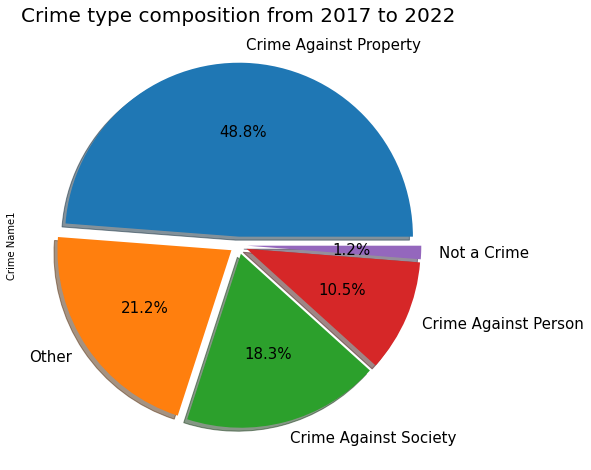

In [1450]:
# count for each sub-categories in crime name1
df['Crime Name1'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(10, 8),
    explode=[0.05, 0.05, 0.05, 0.05, 0.05],
    shadow=True,
    fontsize=15)

plt.title(label='Crime type composition from 2017 to 2022', fontsize=20)

In [1451]:
# sort type of crime name1 in each year
crime1_yealy = df.groupby(
    'year')['Crime Name1'].value_counts().unstack()
crime1_yealy

Crime Name1  Crime Against Person  Crime Against Property  \
year                                                        
2017                         4742                   23693   
2018                         4853                   20857   
2019                         4709                   21344   
2020                         4205                   22106   
2021                         4570                   21002   
2022                         2788                   11704   

Crime Name1  Crime Against Society  Not a Crime  Other  
year                                                    
2017                         12349          664   9915  
2018                         11375          599  10144  
2019                         10371          618  10062  
2020                          5439          499   8986  
2021                          3643          372   8309  
2022                          2072          333   5073

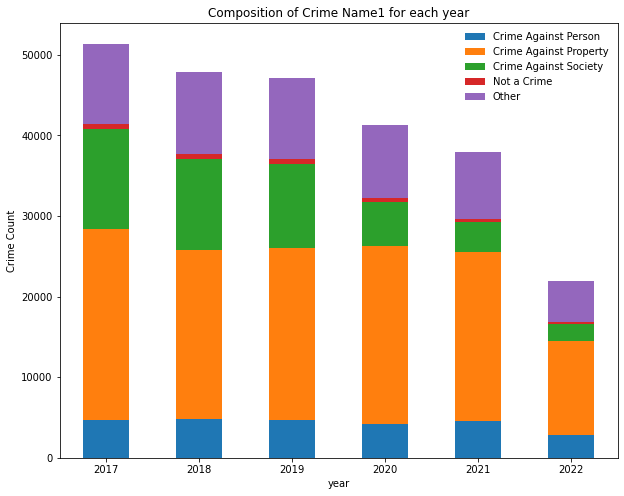

In [1452]:
# plot the type of crime name1 in each year
crime1_yealy.plot.bar(figsize=(10, 8),
                      ylabel='Crime Count',
                      rot=0,
                      stacked=True,
                      title='Composition of Crime Name1 for each year')
plt.legend(frameon=False)

Text(0.5, 0, 'Numbers')

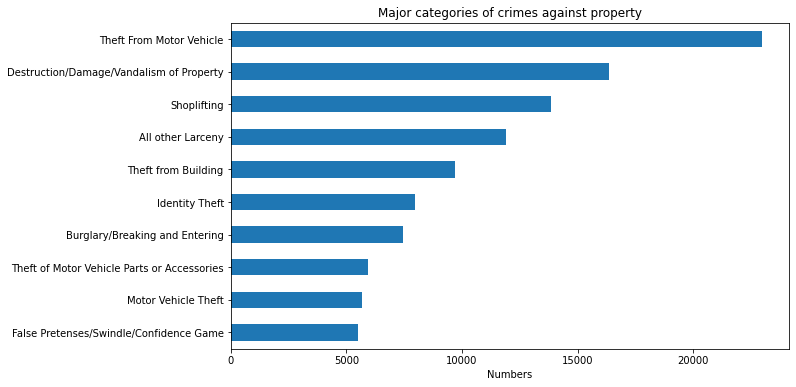

In [1453]:
# further investigation on crime against property
property_crime = df[df['Crime Name1'] == 'Crime Against Property']
# calculate the mean value for crime name2, mean by column
total_count = property_crime['Crime Name2'].value_counts()
mean_val = property_crime['Crime Name2'].value_counts().mean()
# conditional filter out
cp_top = total_count[total_count > mean_val]
# plot
cp_top.sort_values().plot.barh(
    title='Major categories of crimes against property', figsize=(10, 6))
plt.xlabel('Numbers')

# Exploratory Data Analysis:

## 1) Finding null values and dealing with missing values with appropriate justification.

In [1454]:
df.isna().sum()

Dispatch Date / Time      20957
Victims                       0
Crime Name1                 250
Crime Name2                 250
Crime Name3                 250
Police District Name         89
State                         0
Agency                        0
Place                         0
Street Type                 249
Start_Date_Time               0
Latitude                      0
Longitude                     0
Police District Number        0
Drugs or Narcotics            0
Online or Offline             0
handling_time_in_hours    20957
year                          0
month                         0
day                           0
day_of_the_week               0
hour                          0
start_time                    0
time_of_the_day               0
dtype: int64

In [1455]:
# Remove Crime Name1,2,3 - couldn't identify through offense as the codes.
df.dropna(subset = ['Crime Name1'], inplace = True)


In [1456]:
# drop "not a crime" and rows containing null values of handling_time_in_hours, Street type, police district name
df.drop(df[df["Crime Name1"]== "Not a Crime"].index, inplace = True)
df.dropna(subset = [("handling_time_in_hours"),("Street Type"), ("Police District Name")], inplace = True)

In [1457]:
# check all null values
df.isna().sum()

Dispatch Date / Time      0
Victims                   0
Crime Name1               0
Crime Name2               0
Crime Name3               0
Police District Name      0
State                     0
Agency                    0
Place                     0
Street Type               0
Start_Date_Time           0
Latitude                  0
Longitude                 0
Police District Number    0
Drugs or Narcotics        0
Online or Offline         0
handling_time_in_hours    0
year                      0
month                     0
day                       0
day_of_the_week           0
hour                      0
start_time                0
time_of_the_day           0
dtype: int64

## 2) Correlation structures, distribution characteristics

In [1458]:
df.corr()

Victims  Latitude  Longitude  handling_time_in_hours  \
Victims                 1.000000  0.025961  -0.015973               -0.012558   
Latitude                0.025961  1.000000  -0.679867                0.013233   
Longitude              -0.015973 -0.679867   1.000000               -0.015752   
handling_time_in_hours -0.012558  0.013233  -0.015752                1.000000   
year                    0.013982 -0.002060  -0.011057               -0.024398   
day                     0.000274 -0.002891   0.003368               -0.079544   
hour                    0.004157 -0.012336   0.015055               -0.105528   

                            year       day      hour  
Victims                 0.013982  0.000274  0.004157  
Latitude               -0.002060 -0.002891 -0.012336  
Longitude              -0.011057  0.003368  0.015055  
handling_time_in_hours -0.024398 -0.079544 -0.105528  
year                    1.000000 -0.012738 -0.031529  
day                    -0.012738  1.000000  0.024886  
hour                   -0.031529  0.024886  1.000000

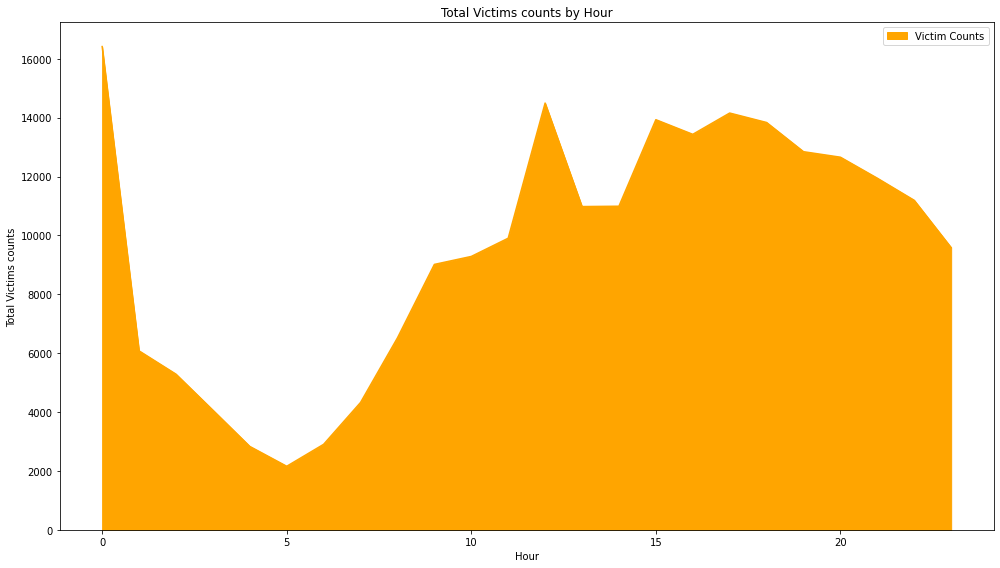

In [1459]:
victims_by_hour = df.groupby(df['hour'])[['Victims']].sum()

victims_by_hour.plot(kind='area',
             title='Total Victims counts by Hour',
             ylabel='Total Victims counts',
             xlabel='Hour',
             figsize=(14, 8), color='orange')

axis = plt.gca()
l = axis.legend(frameon=True)
l.get_texts()[0].set_text('Victim Counts')
plt.xticks()
plt.tight_layout()

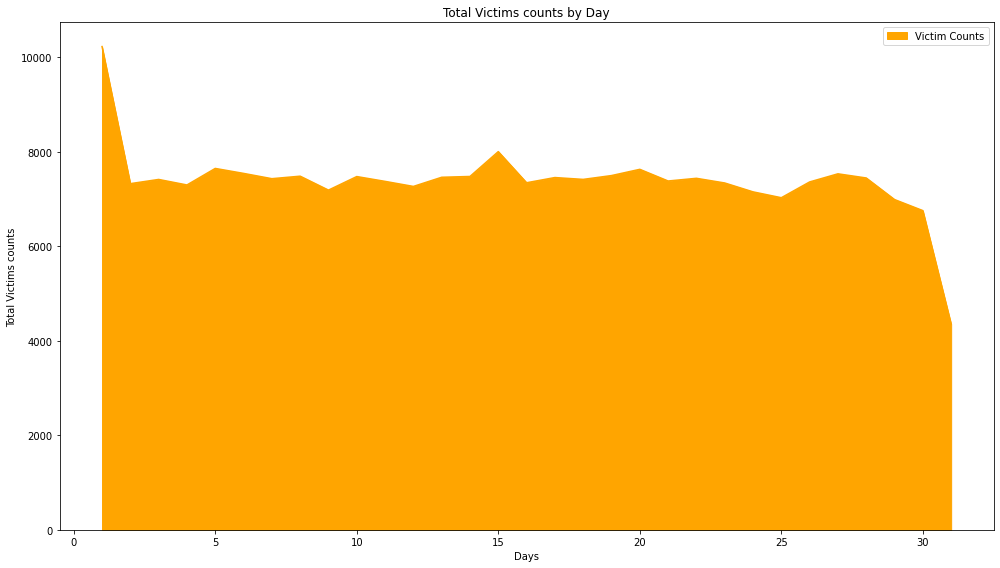

In [1460]:
victims_by_day = df.groupby(df['day'])[['Victims']].sum()

victims_by_day.plot(kind='area',
             title='Total Victims counts by Day',
             ylabel='Total Victims counts',
             xlabel='Days',
             figsize=(14, 8), color='orange')

axis = plt.gca()
l = axis.legend(frameon=True)
l.get_texts()[0].set_text('Victim Counts')
plt.xticks()
plt.tight_layout()

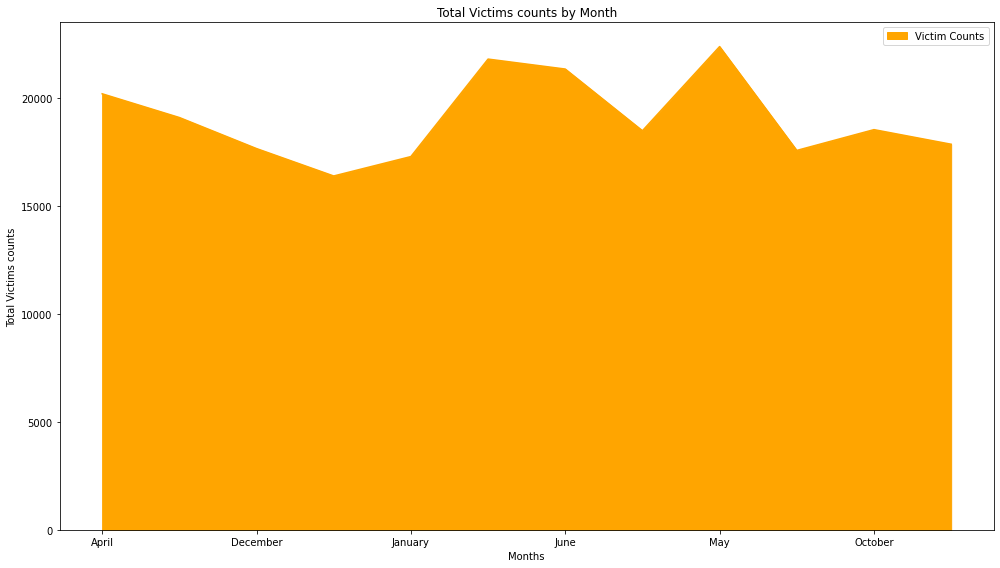

In [1461]:
victims_by_month = df.groupby(df['month'])[['Victims']].sum()

victims_by_month.plot(kind='area',
             title='Total Victims counts by Month',
             ylabel='Total Victims counts',
             xlabel='Months',
             figsize=(14, 8), color='orange')

axis = plt.gca()
l = axis.legend(frameon=True)
l.get_texts()[0].set_text('Victim Counts')
plt.xticks()
plt.tight_layout()


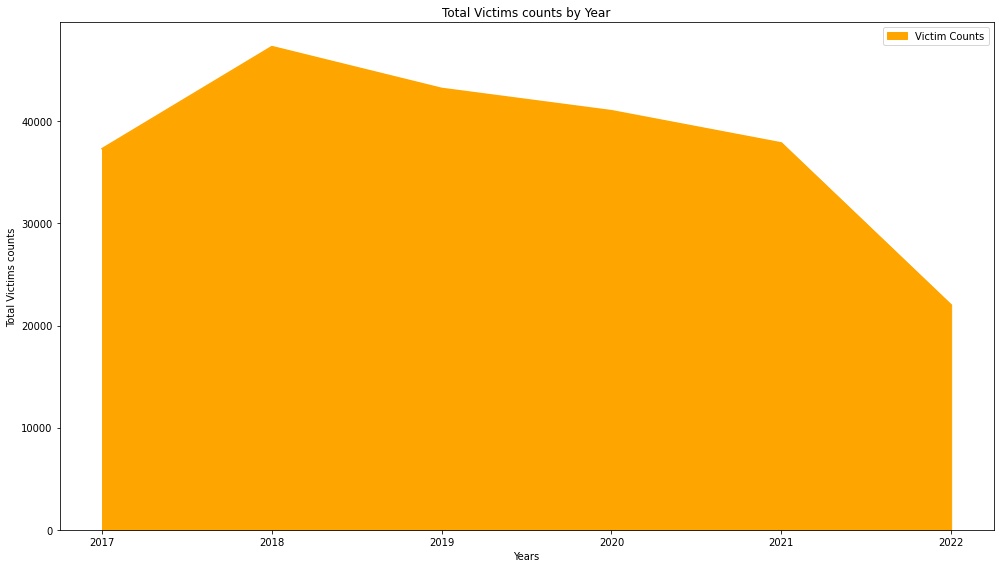

In [1462]:
victims_by_year = df[['year','Victims']]
plot = victims_by_year.groupby(df['year'])[['Victims']].sum()

plot.plot(kind='area',
             title='Total Victims counts by Year',
             ylabel='Total Victims counts',
             xlabel='Years',
             figsize=(14, 8), color='orange')

axis = plt.gca()
l = axis.legend(frameon=True)
l.get_texts()[0].set_text('Victim Counts')
plt.tight_layout()

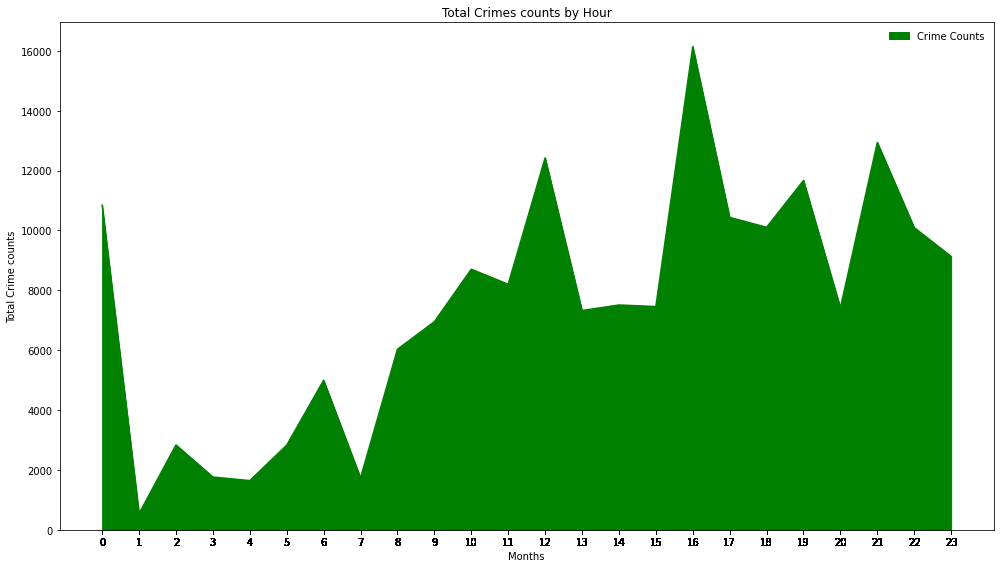

In [1463]:
crimes_by_hour=df[['hour','Crime Name2']]
crimes_by_hour['count']=1
crimes_by_hour_graph=crimes_by_hour.groupby(['hour','Crime Name2'],as_index=False).sum()

by_time = crimes_by_hour_graph.groupby(df['hour'])[['count']].sum()

by_time.plot(kind='area',
             title='Total Crimes counts by Hour',
             ylabel='Total Crime counts',
             xlabel='Months',
             figsize=(14, 8), color='green')

ax = plt.gca()
l = ax.legend(frameon=False)
l.get_texts()[0].set_text('Crime Counts')
plt.xticks(crimes_by_hour_graph['hour'])
plt.tight_layout()

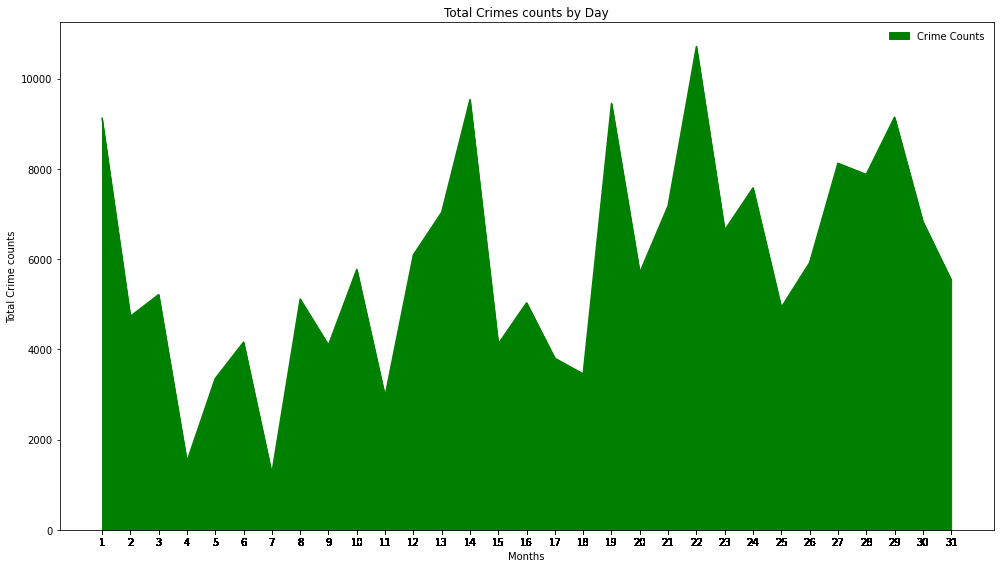

In [1464]:
crimes_by_day=df[['day','Crime Name2']]
crimes_by_day['count']=1
crimes_by_day_graph=crimes_by_day.groupby(['day','Crime Name2'],as_index=False).sum()

plot = crimes_by_day_graph.groupby(df['day'])[['count']].sum()

plot.plot(kind='area',
             title='Total Crimes counts by Day',
             ylabel='Total Crime counts',
             xlabel='Months',
             figsize=(14, 8), color='green')

ax = plt.gca()
l = ax.legend(frameon=False)
l.get_texts()[0].set_text('Crime Counts')
plt.xticks(crimes_by_day_graph['day'])
plt.tight_layout()

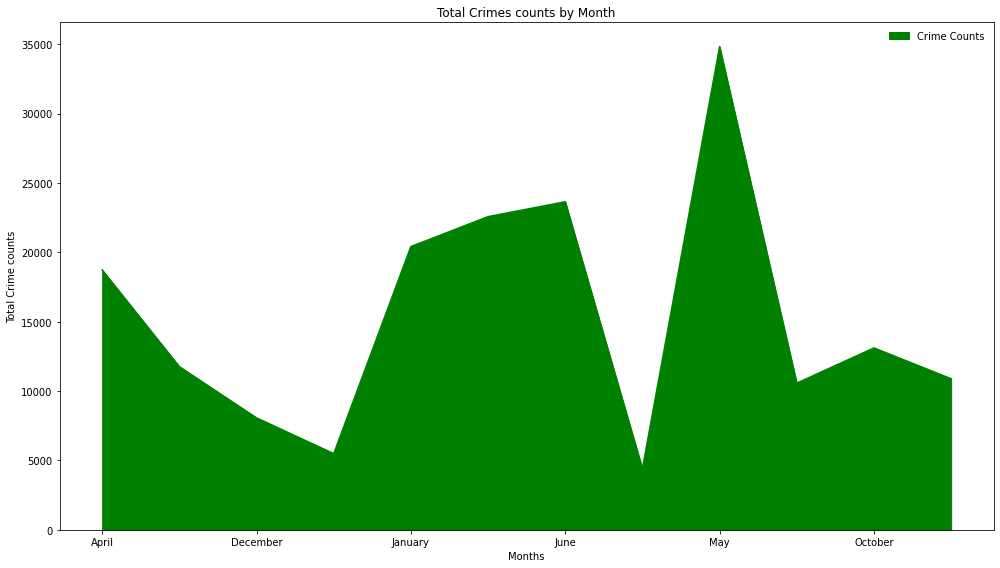

In [1465]:
crimes_by_months=df[['month','Crime Name2']]
crimes_by_months['count']=1
crimes_by_months_graph=crimes_by_months.groupby(['month','Crime Name2'],as_index=False).sum()

plot = crimes_by_months_graph.groupby(df['month'])[['count']].sum()

plot.plot(kind='area',
             title='Total Crimes counts by Month',
             ylabel='Total Crime counts',
             xlabel='Months',
             figsize=(14, 8), color='green')

ax = plt.gca()
l = ax.legend(frameon=False)
l.get_texts()[0].set_text('Crime Counts')
plt.xticks()
plt.tight_layout()

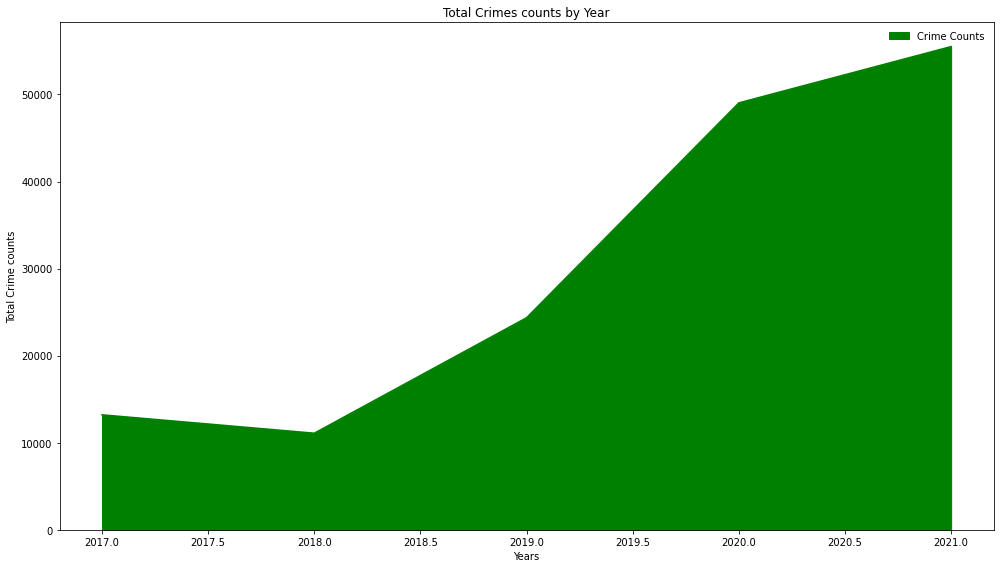

In [1466]:
crimes_by_years=df[['year','Crime Name2']]
crimes_by_years['count']=1
crimes_by_years_graph=crimes_by_years.groupby(['year','Crime Name2'],as_index=False).sum()

plot = crimes_by_years_graph.groupby(df['year'])[['count']].sum()

plot.plot(kind='area',
             title='Total Crimes counts by Year',
             ylabel='Total Crime counts',
             xlabel='Years',
             figsize=(14, 8), color='green')

ax = plt.gca()
l = ax.legend(frameon=False)
l.get_texts()[0].set_text('Crime Counts')
plt.tight_layout()

## 3) Trends in data using appropriate visualization tools

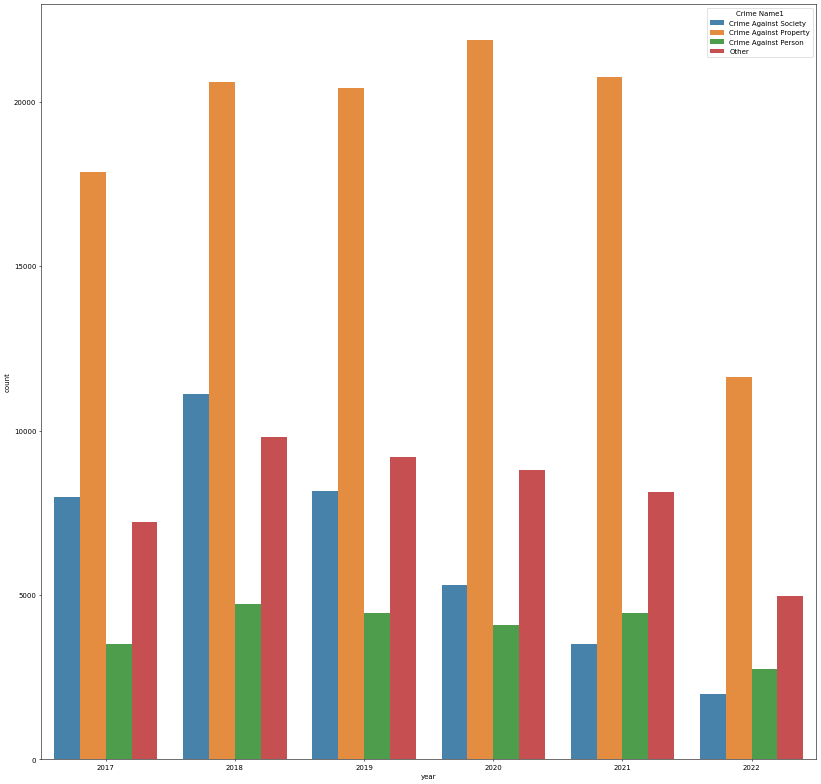

In [1467]:
# Yearly trend of CrimeName 1
plt.figure(figsize=(20,20), dpi=50)
sns.countplot(x='year',  data=df, alpha=0.9, hue = "Crime Name1")

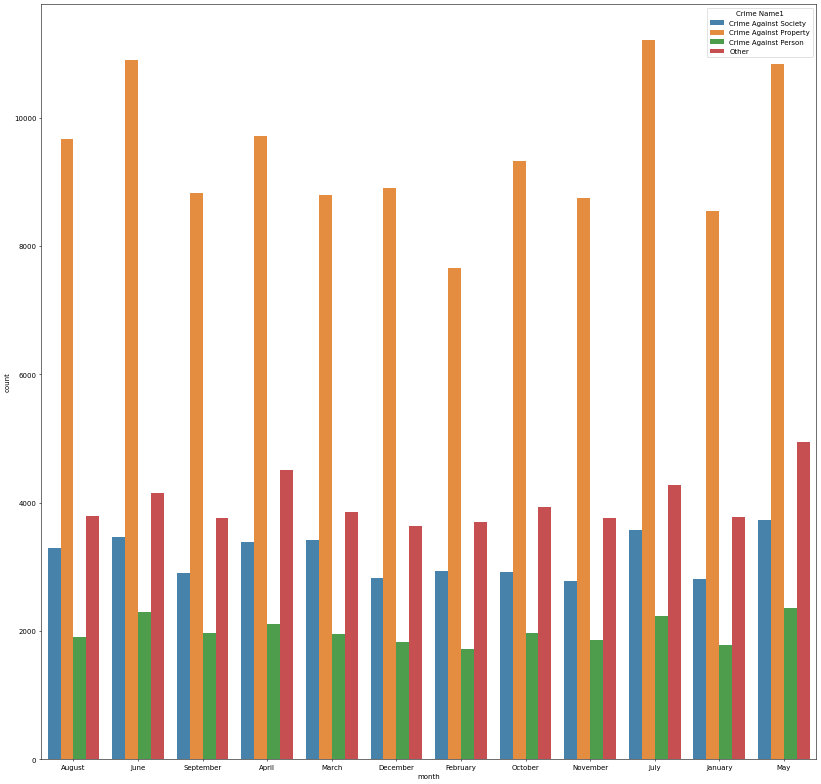

In [1468]:
# Monthly trend of Crime Name1
plt.figure(figsize=(20,20), dpi=50)
sns.countplot(x='month',  data=df, alpha=0.9, hue = "Crime Name1")

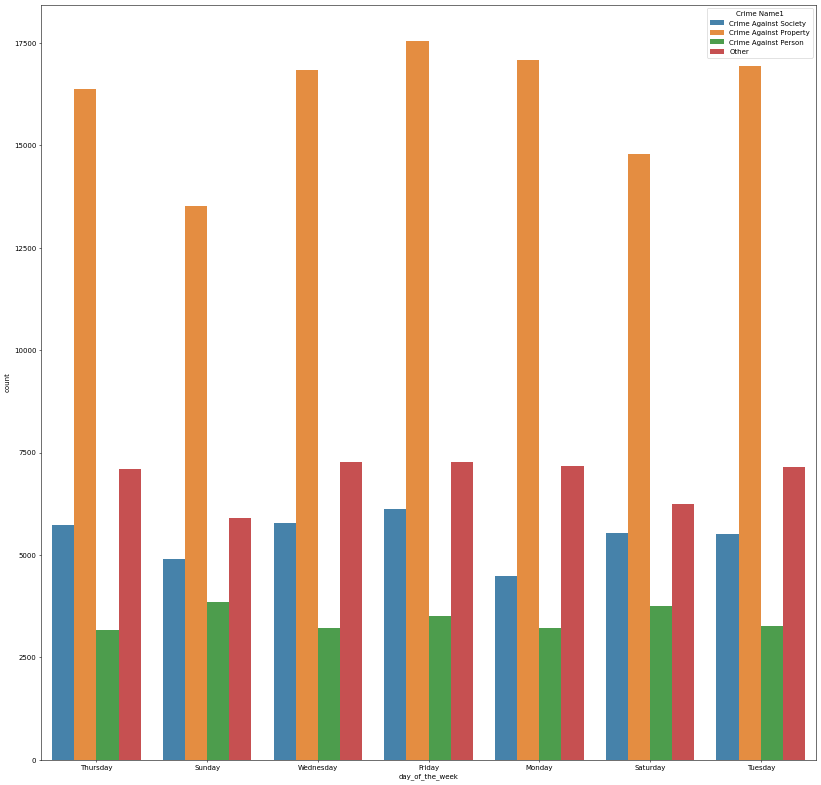

In [1469]:
# day week trend of Crime Name1
plt.figure(figsize=(20,20), dpi=50)
sns.countplot(x='day_of_the_week',  data=df, alpha=0.9, hue = "Crime Name1")

## 4) Using appropriate plots, present the results of the research questions previously identified in the research report.


### (Ⅰ) Where are the geographical hotspots for crime in Montgomery, and why are these patterns occurring?

In [1470]:

df_geo = df[['Latitude', 'Longitude']]

crime_map = folium.Map(location=[39.0374, -77.0517],
                       tiles='OpenStreetmap',
                       zoom_start=9,
                       min_zoom=2.0)
crime_map.add_child(plugins.HeatMap(df_geo, radius=5, min_opacity=1, blur=15))
crime_map

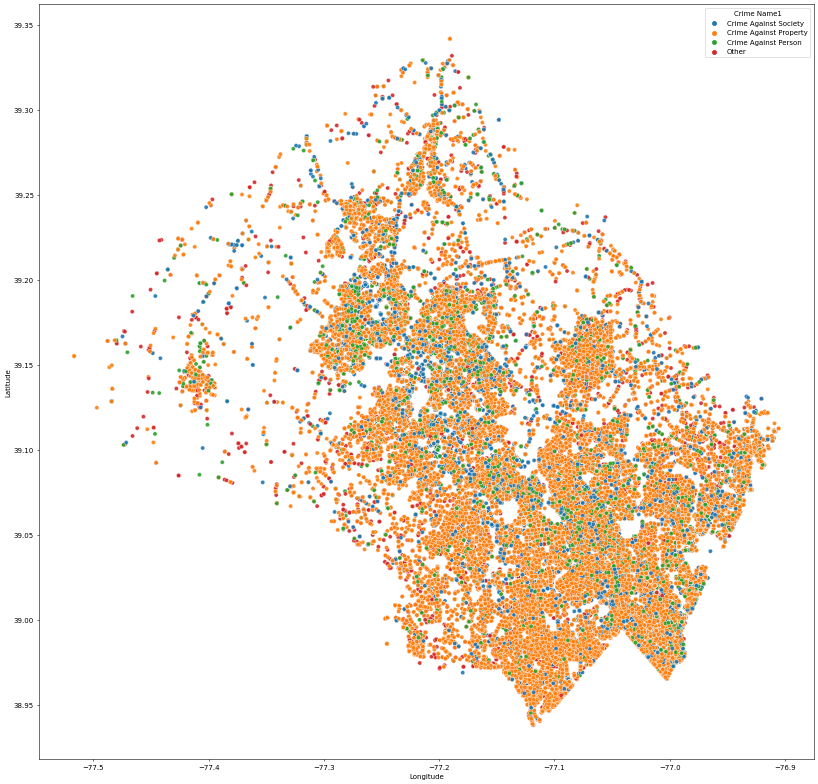

In [1471]:
# Scatterplot for longtitude and latitude
plt.figure(figsize=(20,20), dpi=50)
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.9, hue = "Crime Name1")

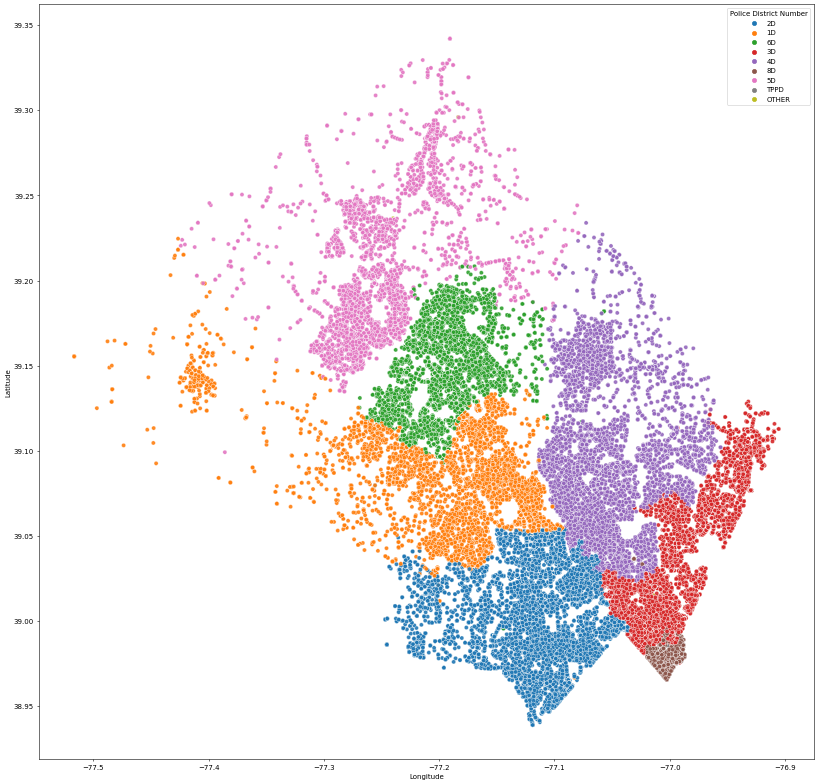

In [1472]:
# Scatterplot for longtitue and latitude
df_test = df[df['Crime Name1'] == 'Crime Against Property']
plt.figure(figsize=(20,20), dpi=50)
sns.scatterplot(x='Longitude', y='Latitude', data=df_test, alpha=0.9, hue = "Police District Number")

From the above integrated map and the plotted map in the scatterplot we can see that south area has more crimes recorded than north especially north west. This is due to the north area seems to be rural and has huge sanctuary and parks. Numbers of crime against properties in south is considerably large.

### (Ⅱ) Which time of the day does the highest volume of crimes take place, and is there a reason for these spikes?

In [1473]:
df2=df[['hour','Crime Name2']]
df2['count']=1
df3=df2.groupby(['hour','Crime Name2'],as_index=False).sum()

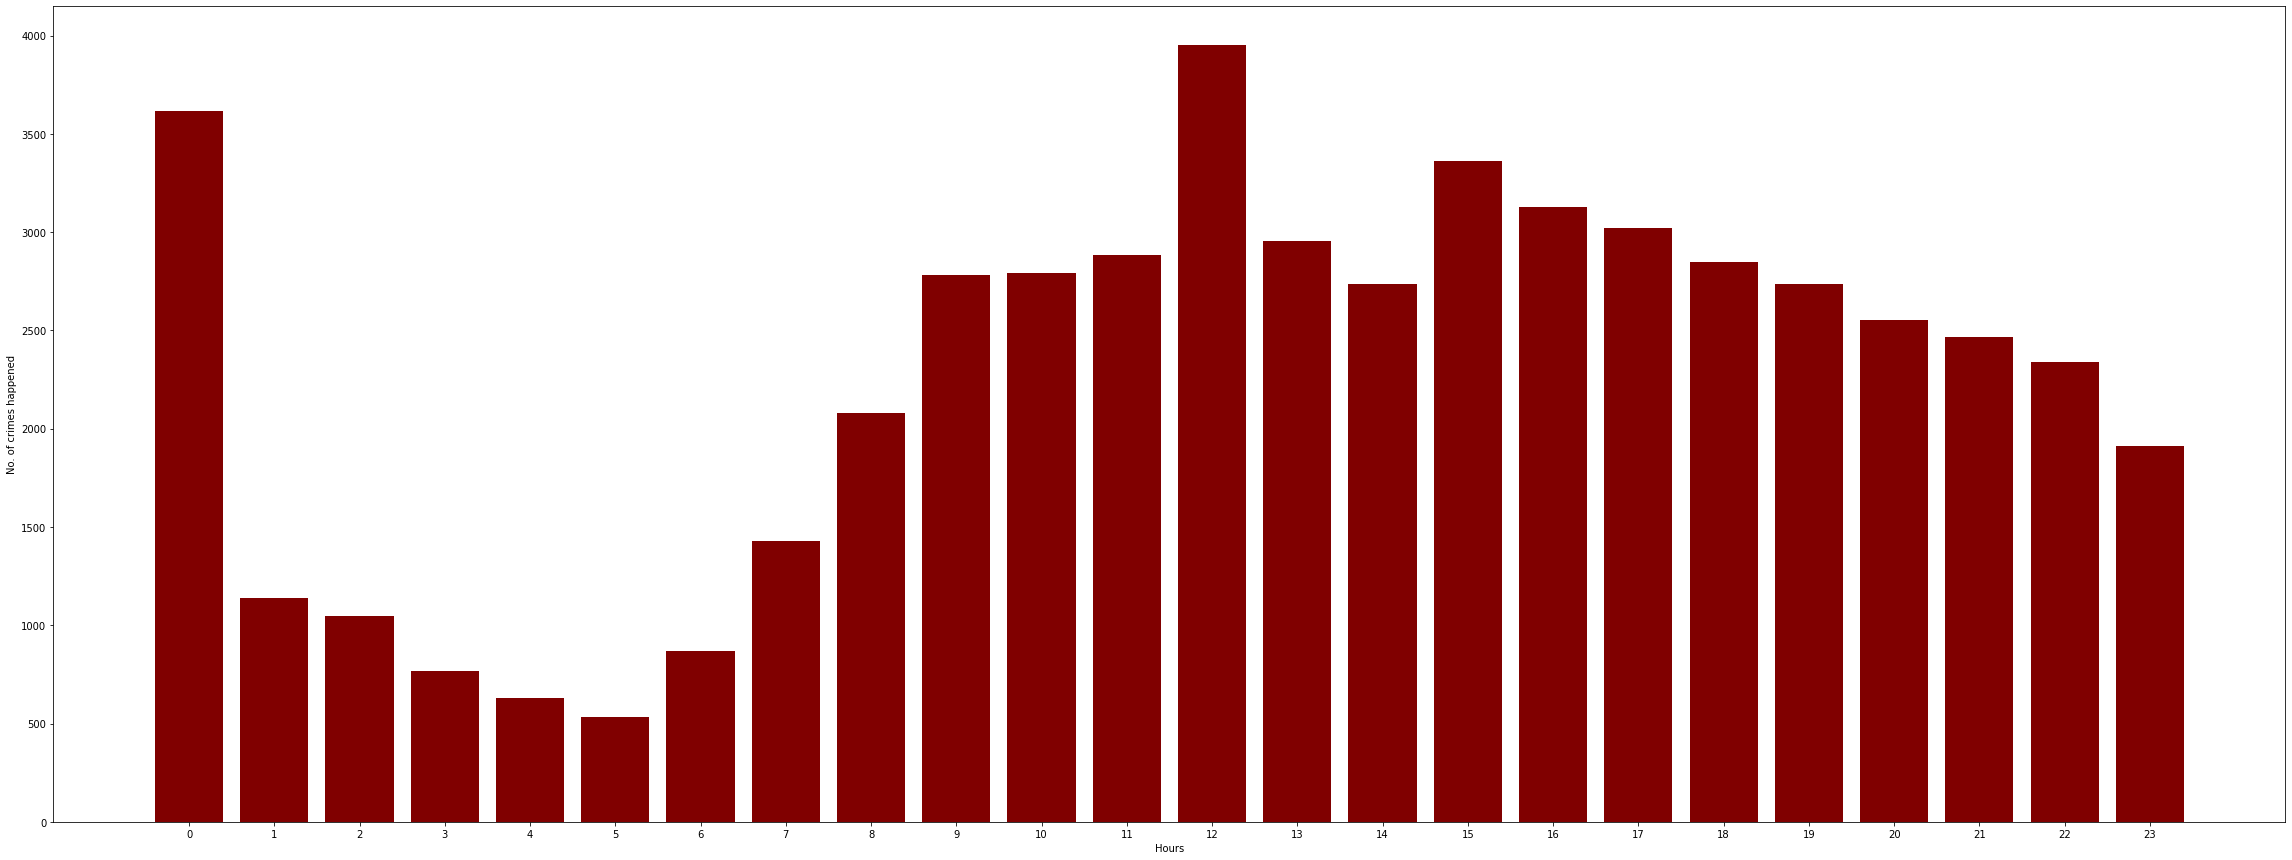

In [1474]:
fig = plt.figure(figsize = (40, 15))
 
# creating the bar plot
plt.bar(df3["hour"].astype(str),df3["count"], color ='maroon')
 
plt.xlabel("Hours")
plt.ylabel("No. of crimes happened")
plt.show()

The above two graphs help to find the highest crimes happened time in a day. Most of the crimes are happened around 12 pm as per the plot shown above.

### (Ⅲ) Which month of the year does the highest volume of crimes take place, and is there a reason for these spikes?

In [1475]:
df4=df[['month','Crime Name2']]
df4['count']=1
df5=df4.groupby(['month','Crime Name2'],as_index=False).sum()

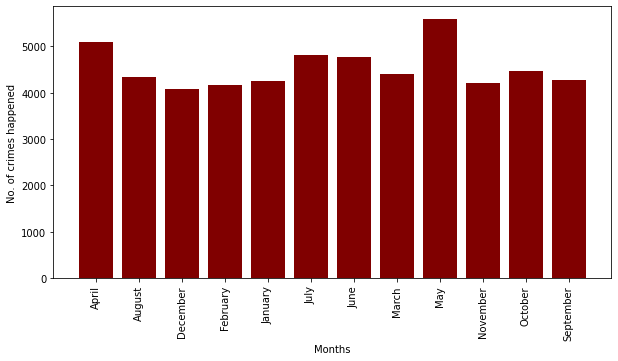

In [1476]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df5["month"], df5["count"], color ='maroon')
plt.xlabel("Months")
plt.xticks(rotation=90)
plt.ylabel("No. of crimes happened")

plt.show()

The above two graphs help to find the highest crimes happened month. Most of the crimes are happened around May and April in a year.

### (Ⅴ) Is there a link between the amount of crime that occurs in a location and the history of narcotics use and gun ownership in that area?

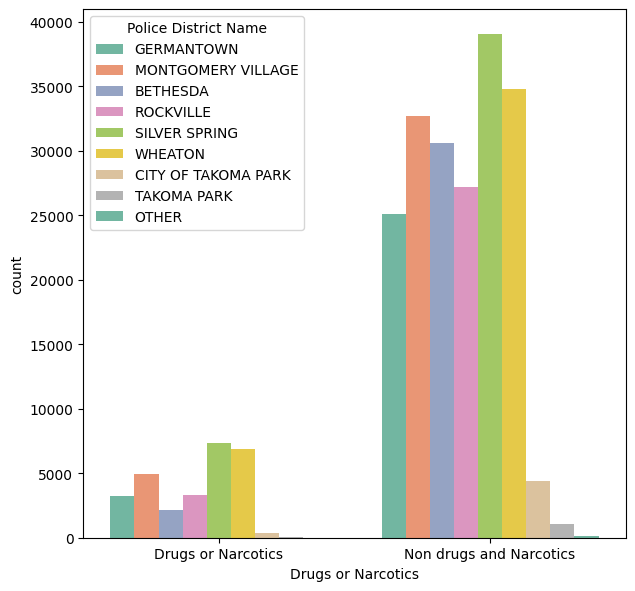

In [1477]:
# Countplot for drugs
plt.figure(figsize=(7,7), dpi=100)
sns.countplot(data=df, x="Drugs or Narcotics", palette='Set2', hue= 'Police District Name' )

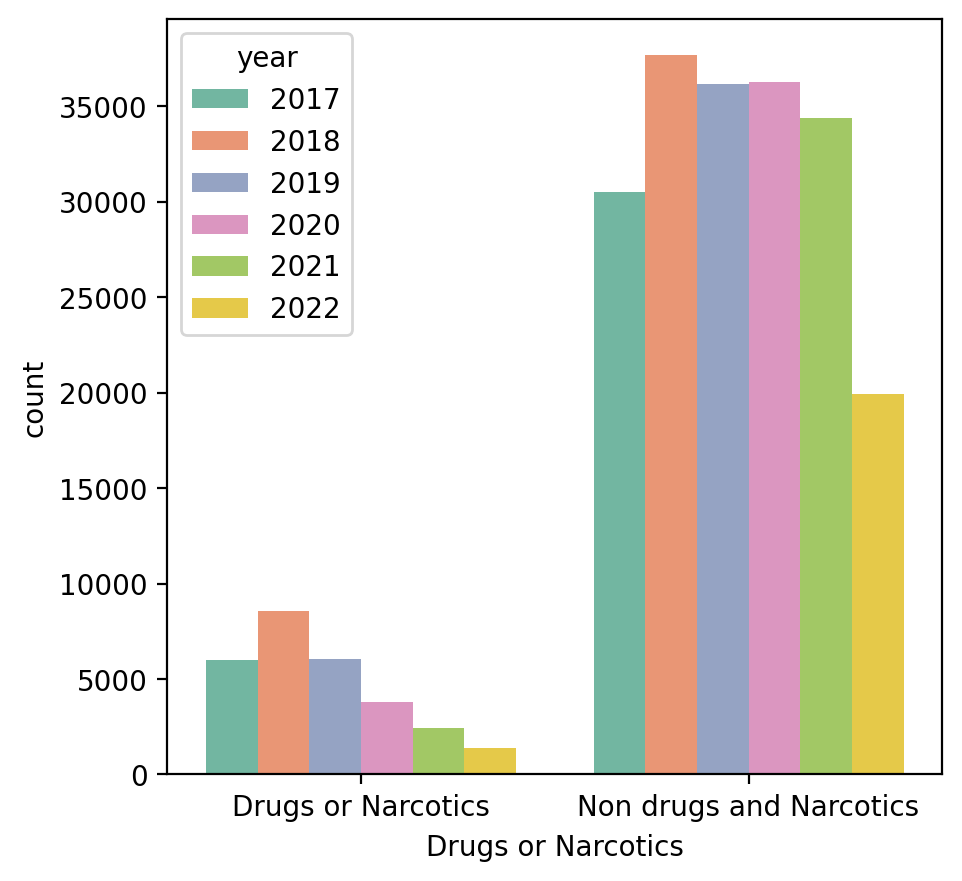

In [1478]:
# Countplot for drugs
plt.figure(figsize=(5,5), dpi=200)
sns.countplot(data=df, x="Drugs or Narcotics", palette='Set2', hue= "year")

From the countplots it is visible, higher narcotics and high gun culture cities has high crime rates. Silver Spring police district has the highest crimes, which also has highest narcotic and gun culture.

### (Ⅵ) Is there an increase in the number of digital crimes when looked at in comparison with the amount of non-digital crimes?

In [1479]:
# Check value counts for offline and online crimes
df["Online or Offline"].value_counts()

Offline crimes    222977
Online frauds        271
Name: Online or Offline, dtype: int64

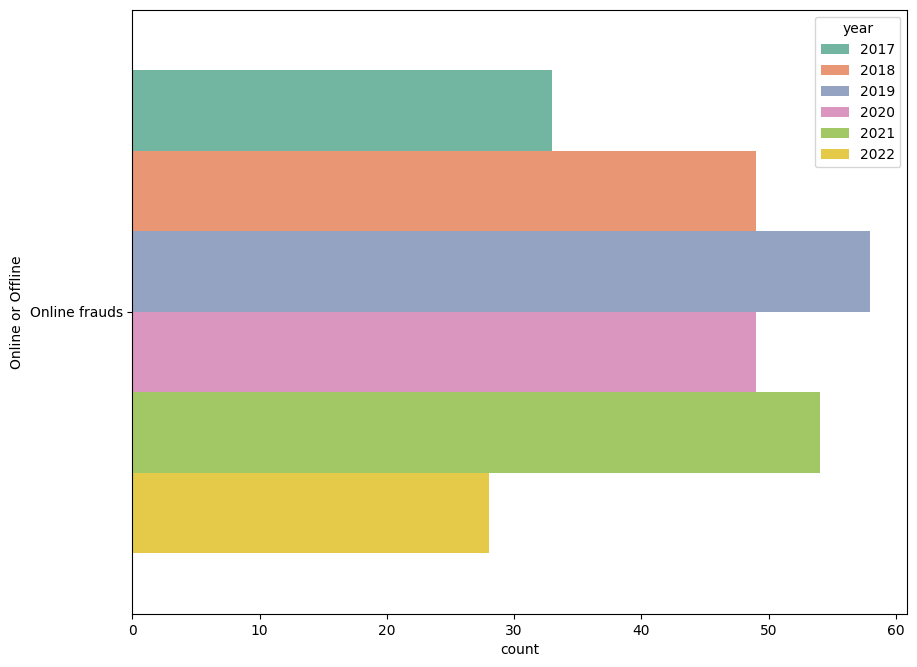

In [1480]:
# Online frauds in countplot
df_test = df[df['Online or Offline'] == 'Online frauds']
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df_test, y="Online or Offline", palette='Set2', hue = "year")

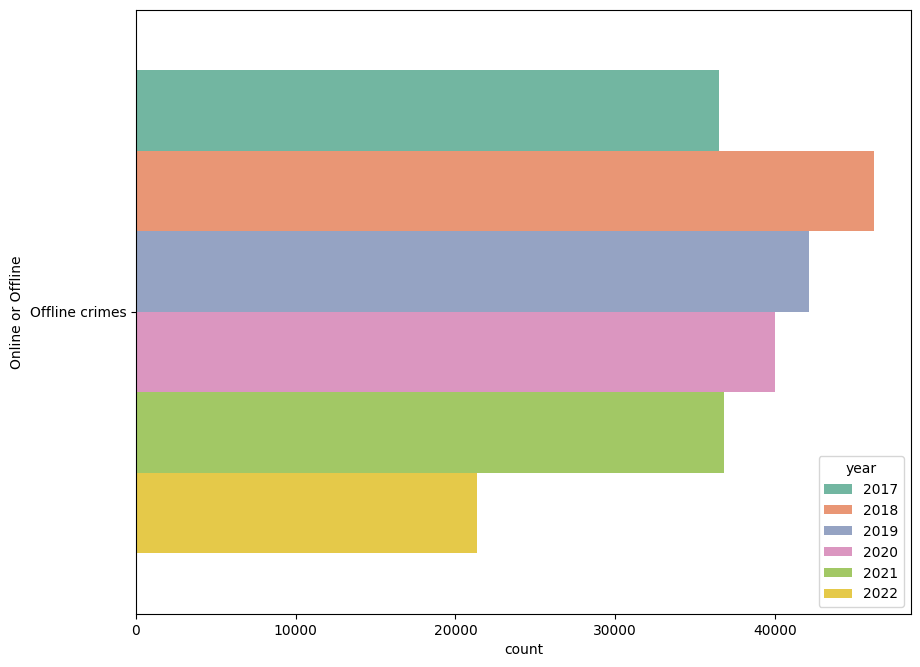

In [1481]:
# Countplot for offline crimes
df_test2 = df[df['Online or Offline'] == 'Offline crimes']
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df_test2, y="Online or Offline", palette='Set2', hue = "year")

Both of these plots illustrates online frauds and offline crimes. As you can see highest online crimes took place in 2021 and 2019. Both of the graphs has a very similar patterns except on 2019 and 2021.

### (Ⅶ) Is there a link between the street types and the number of crimes or types of crimes that occur on them?

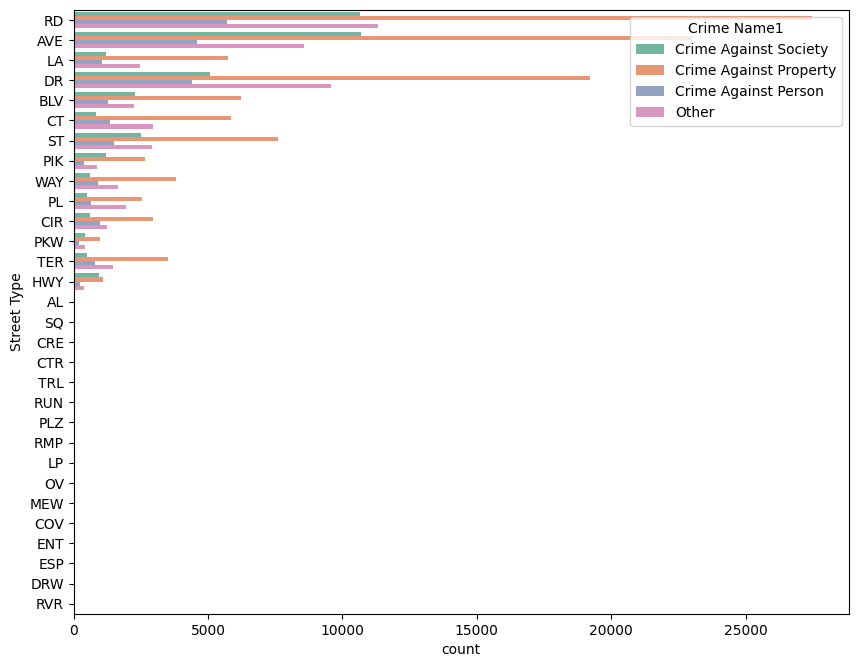

In [1482]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df_test2, y="Street Type", palette='Set2', hue = "Crime Name1")

As shown in the above plot some of the street types has very less crimes. If the types are known when we can determine highway kind of streets has less crimes compared normal avenue roads.

### (Ⅷ) Which degree (violent or non-violent) of crime occurs the most?

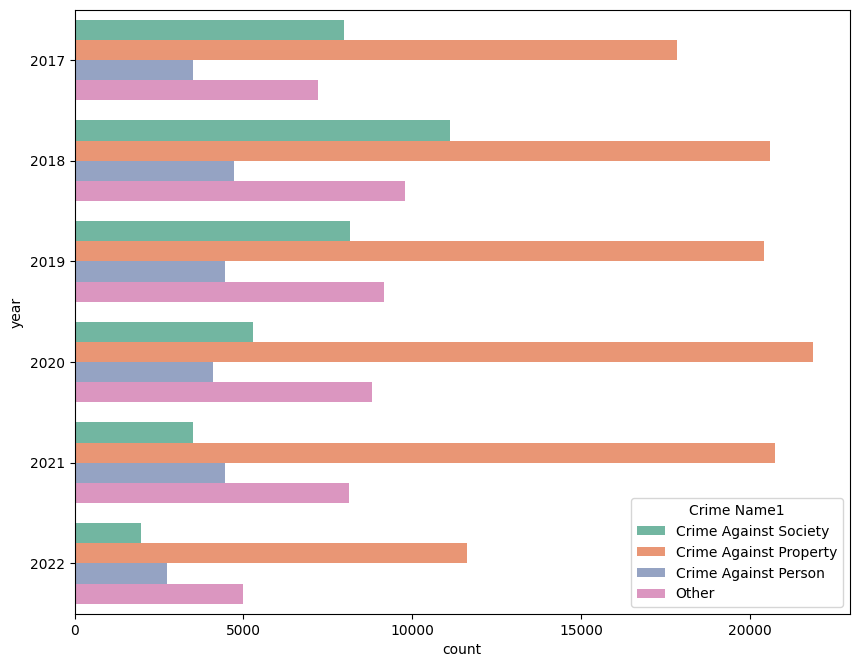

In [1483]:
# Countplot for crime name1
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y="year", palette='Set2', hue = "Crime Name1")

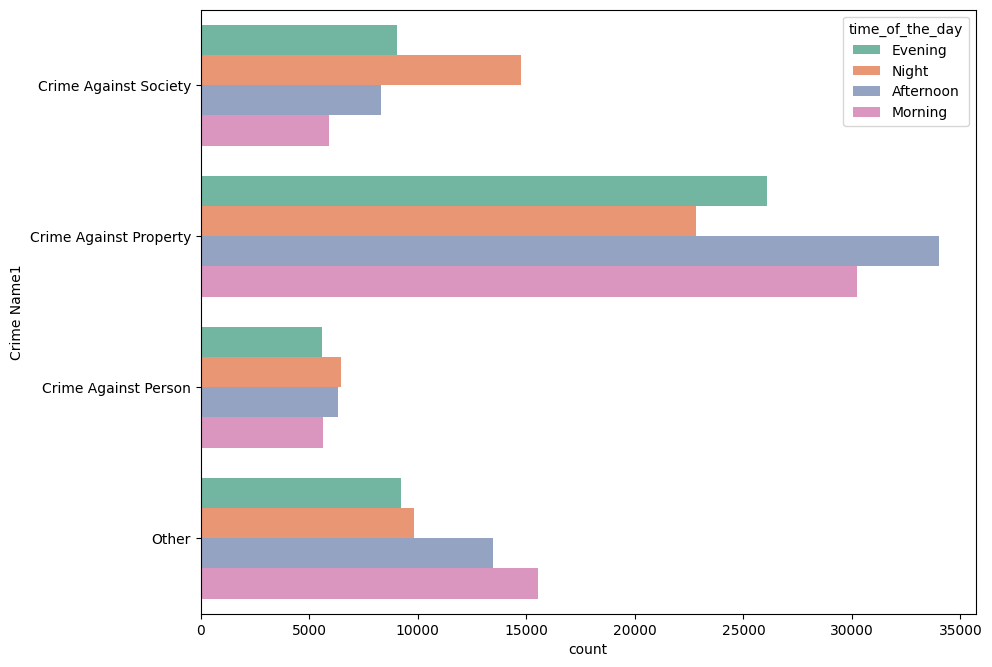

In [1484]:
# Countplot for crimename1
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y="Crime Name1", palette='Set2', hue = "time_of_the_day")

We have considered "Crime Against Person" as high violent crime. From the above plots we can determine highly violent crimes are happen less often than other crimes. High violent crime more likely to happen on any part of the day, as from the plot we can't distinguish much different from the plot.

### (Ⅸ) Is there a pattern between which degree of crime occurs in Montgomery County and the time of day these occur at?

The objective of this problem statement is to find and approximate time for the type of crimes happen. It will help police officers to manage their duties in those times and also it will help people to be more careful. Proceeding the Start_Date_Time column and the Crime Name 2 column to get an approximate time for type of crimes happen.

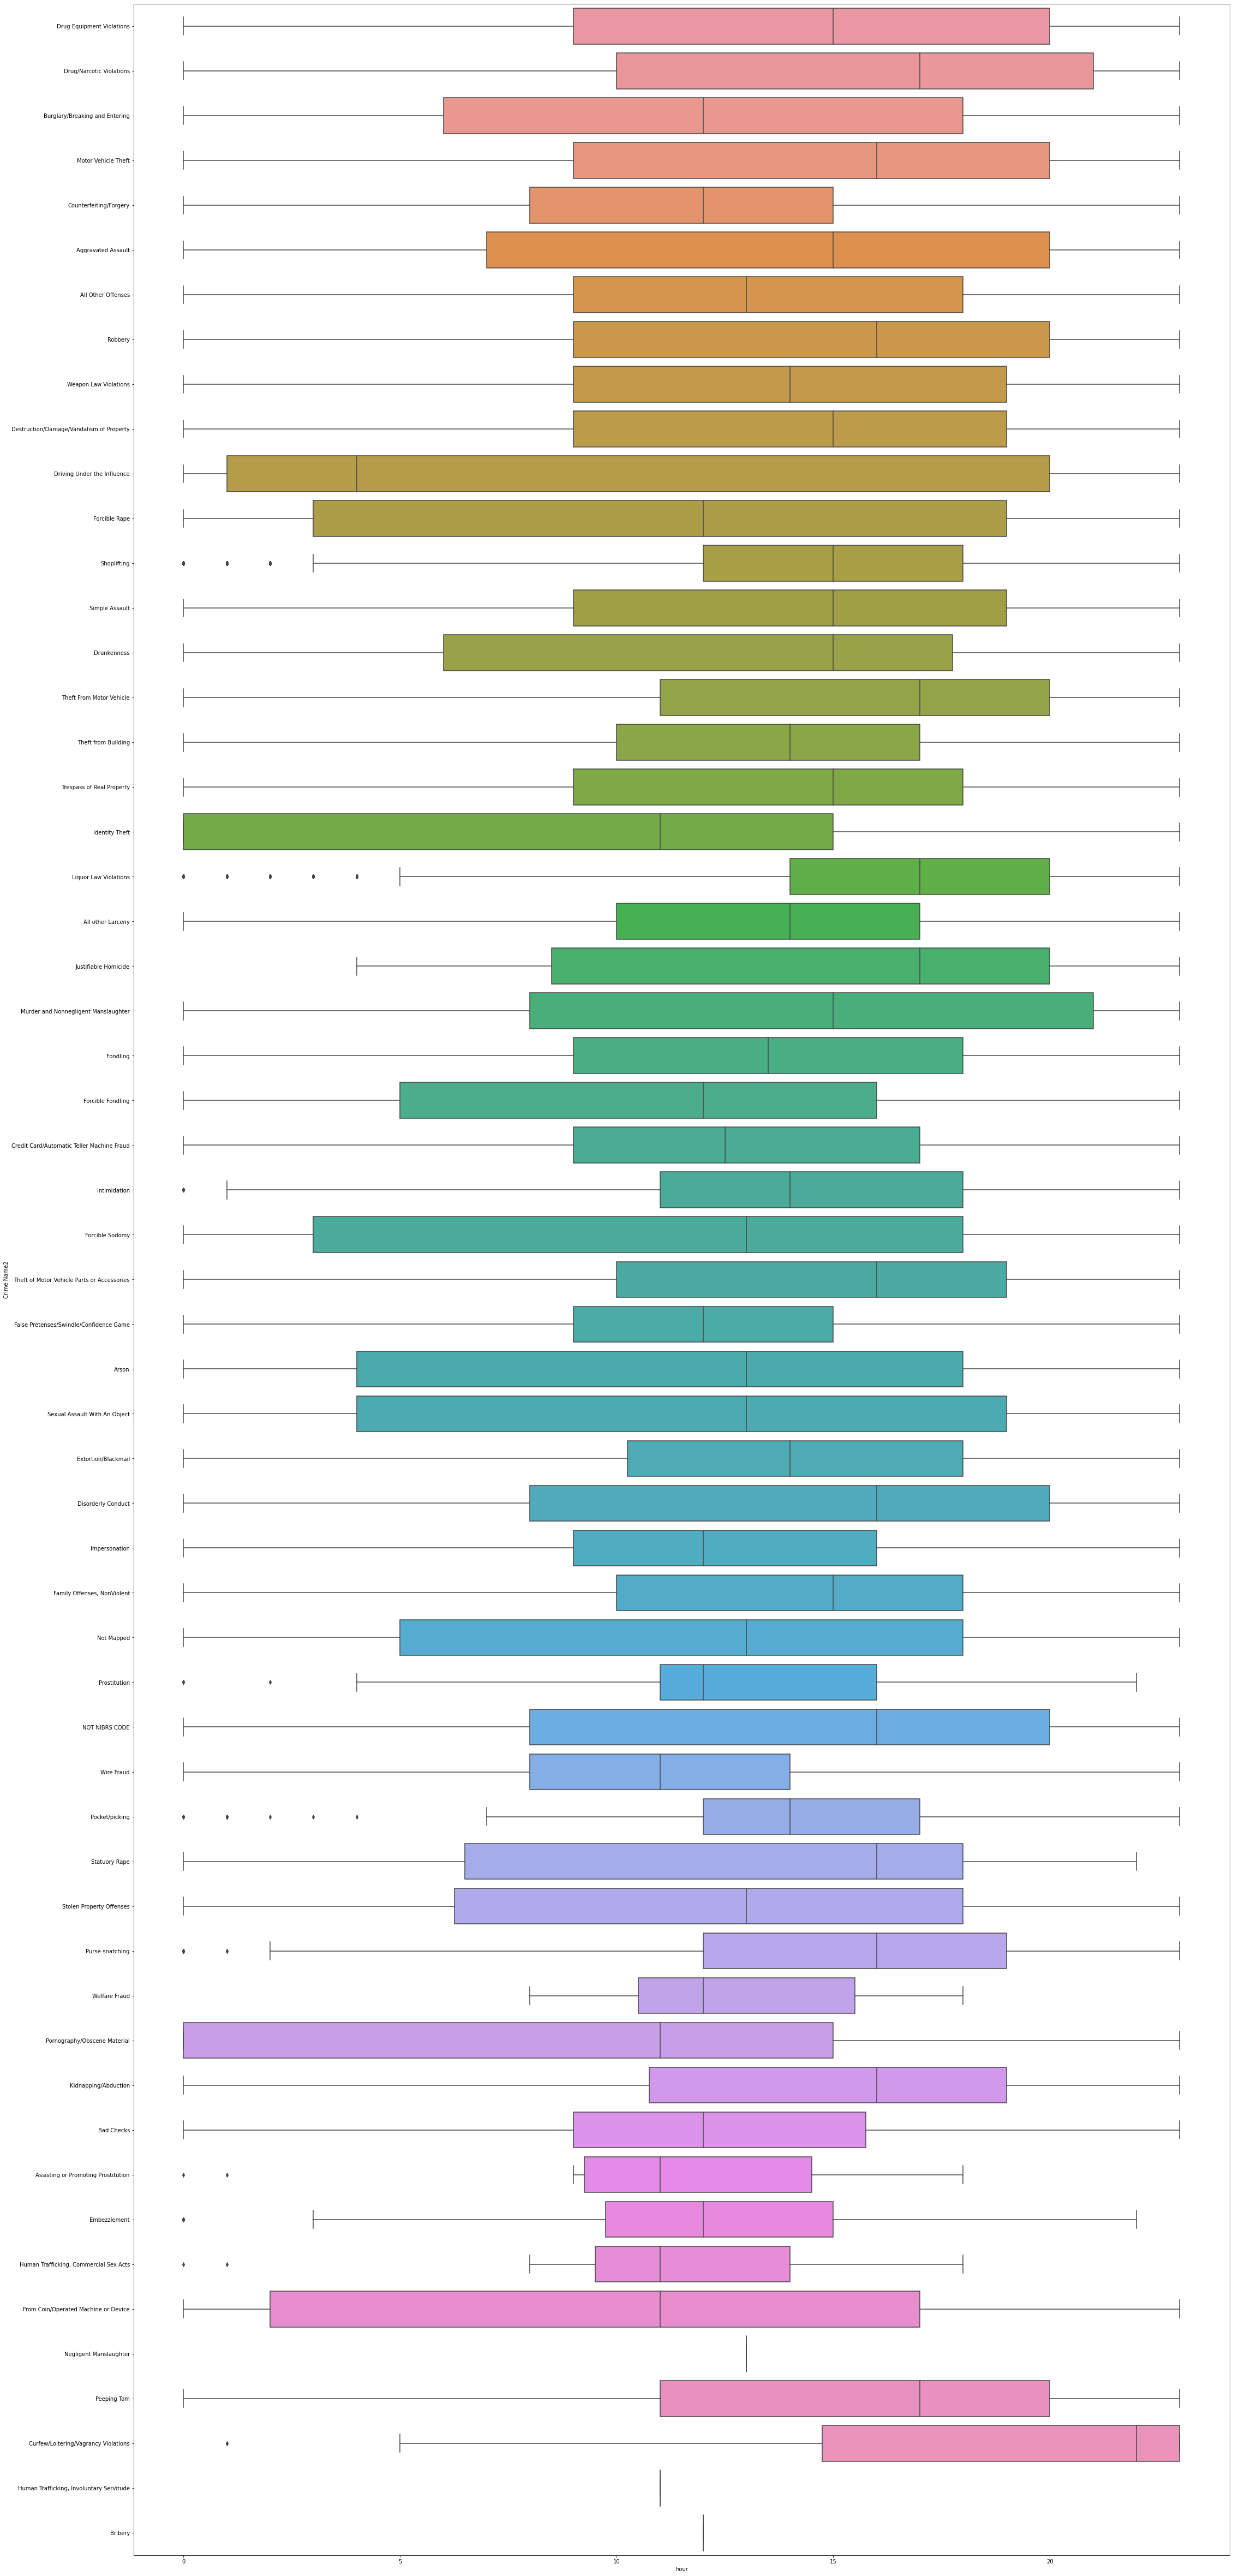

In [1485]:
plt.figure(figsize=(36, 86))
sns.boxplot( y=df["Crime Name2"], x=df["hour"], data = df );
plt.show()

The above boxplot graph is showing the time range for happening crime based on the data between 2017 and 2022. This helps to find the minimum time by the lowest line, maximum time by top line and approximate time by middle line.

## 5) Correlation analysis


*   The crime incident map shows the hotspots around a shopping centre, which correlates with the result that most crimes are committed against property.
*   From 2020, there has been a decline in the number of crimes and victims but 2022 only has data upto August.
*   The crimes involving 'ASSAULT AGGRAVATED, ASSAULT, WEAPON AND GUN' result in more victims by analysing the mean values of each crime category.
*   The annual distribution of crime is quite similar between 2017 to 2022
*   Crime Against Property category has the highest distribution in Crime Name1.
*   Most crimes are recorded around 12 AM, with the lowest recorded around 5:00 am.



# Appendix:

In [1486]:
# finding the total number crimes in a given date
df.groupby(pd.Grouper(freq='M', key='Start_Date_Time')).count()

Dispatch Date / Time  Victims  Crime Name1  Crime Name2  \
Start_Date_Time                                                            
2017-01-31                        129      129          129          129   
2017-02-28                         94       94           94           94   
2017-03-31                        277      277          277          277   
2017-04-30                       3492     3492         3492         3492   
2017-05-31                       4079     4079         4079         4079   
2017-06-30                       3950     3950         3950         3950   
2017-07-31                       3934     3934         3934         3934   
2017-08-31                       4193     4193         4193         4193   
2017-09-30                       4121     4121         4121         4121   
2017-10-31                       4246     4246         4246         4246   
2017-11-30                       4092     4092         4092         4092   
2017-12-31                       3932     3932         3932         3932   
2018-01-31                       3735     3735         3735         3735   
2018-02-28                       3567     3567         3567         3567   
2018-03-31                       3743     3743         3743         3743   
2018-04-30                       3865     3865         3865         3865   
2018-05-31                       3964     3964         3964         3964   
2018-06-30                       4078     4078         4078         4078   
2018-07-31                       4066     4066         4066         4066   
2018-08-31                       4011     4011         4011         4011   
2018-09-30                       3762     3762         3762         3762   
2018-10-31                       3976     3976         3976         3976   
2018-11-30                       3679     3679         3679         3679   
2018-12-31                       3803     3803         3803         3803   
2019-01-31                       3484     3484         3484         3484   
2019-02-28                       3289     3289         3289         3289   
2019-03-31                       3896     3896         3896         3896   
2019-04-30                       3803     3803         3803         3803   
2019-05-31                       4014     4014         4014         4014   
2019-06-30                       3648     3648         3648         3648   
2019-07-31                       3827     3827         3827         3827   
2019-08-31                       3651     3651         3651         3651   
2019-09-30                       3172     3172         3172         3172   
2019-10-31                       3198     3198         3198         3198   
2019-11-30                       3120     3120         3120         3120   
2019-12-31                       3104     3104         3104         3104   
2020-01-31                       3622     3622         3622         3622   
2020-02-29                       3519     3519         3519         3519   
2020-03-31                       3436     3436         3436         3436   
2020-04-30                       2619     2619         2619         2619   
2020-05-31                       3250     3250         3250         3250   
2020-06-30                       3197     3197         3197         3197   
2020-07-31                       3504     3504         3504         3504   
2020-08-31                       3419     3419         3419         3419   
2020-09-30                       3407     3407         3407         3407   
2020-10-31                       3399     3399         3399         3399   
2020-11-30                       3286     3286         3286         3286   
2020-12-31                       3403     3403         3403         3403   
2021-01-31                       3041     3041         3041         3041   
2021-02-28                       2758     2758         2758         2758   
2021-03-31                       3341     3341         3341      

Currently, police departments are struggling to finish a crime in the expected time frame. By failing to finish the crime as soon as possible the police departments are creating an unfavourable image among the people. This causes adverse effects on our defence system. The objective of this problem statement is to find an approximate time frame for police departments to take action against crimes such as lost property, theft & sexual rape. it will help police departments to improve their structures and procedures to reduce the time for taking action against a crime. using the given dataset can find an approximate time frame for solving crimes. the difference between the Dispatched_Date/Time and Start_Date_Time gives the time frame for solving each case. so, by processing the crimeName column and the time frame can get an average time frame for each case to solve the case.